# Objectives¶

## Context

### RealFi
You work for RealFi, a private debt marketplace that connects fintechs with investors. These fintechs offer small-business loans but need debt capital themselves to keep lending. RealFi bridges that gap by connecting fintechs with investors who provide the necessary funds. We perform data-backed due diligence to determine if a fintech is a solid investment. If they are, we structure a loan deal and list it on our platform. Investors can then explore opportunities, decide where to invest, and use our platform to monitor the fintech's performance in real time.


## Business and Data Understanding
Example: A fintech called CashConnect lends to small businesses in East Africa. They provide loans ranging from 100 to 200 dollars with a 30-day term. After three years of operation, CashConnect has successfully grown its loan book to 14.2 million dollars. They’re ready to scale but need more capital to keep lending. So, they turn to RealFi, which, after a thorough data-backed due diligence process, determines that CashConnect is a solid investment. RealFi connects them with investors willing to provide an 18-month loan of 2 million dollars at an attractive rate. We organise the deal, earn a spread, and integrate with CashConnect’s Loan Management System (LMS) for real-time monitoring and analytics

## Strategy

### Data-backed due diligence
At RealFi, we believe that analysing fintechs' granular loan tape data allows us to make smarter investment decisions compared to traditional methods that rely on aggregated financial statements. Here are some of the ways we do this:
*   Real-time Monitoring: By integrating directly with fintechs' Loan Management Systems (LMS), we gain access to high-frequency loan tape data, enabling us to spot issues as they come up.
*   Forecasting: The wealth of loan tape data lets us leverage machine learning techniques to enhance our predictions and forecasting of fintech performance.
*   Fraud Detection: We can identify fraudulent activities within the fintech’s operations and among their end-borrowers.


## Business objective
You are a data analyst on RealFi’s investment team, leading the loan tape analysis. A fintech company called Swift Loan is seeking $1 million in debt capital, and the team is conducting due diligence to determine if they are a suitable investment.

Your tasks are:

1.   Create a data quality report for the investment team: What is your evaluation of the loan tape data quality? Is it accurate and consistent enough for further analysis? How do you rate Swift Loan’s data capabilities, and what follow-up questions would you ask at this early stage to get a better understanding?

2.   Develop a plan of action to address any data quality issues:  Propose a detailed approach for addressing any inconsistencies and ensuring the integrity of the data moving forward. How would you communicate your findings and proposed solutions to the investment team? How would you engage with Swift Loan on an ongoing basis? Share examples of any reports that you feel could be useful in this process.

3.	Provide portfolio performance metrics to the investment team: The investment team needs your assistance in calculating key portfolio performance metrics from the loan tape. While the loan tape may not be perfectly clean, please be pragmatic and handle any data issues as best you can. Additionally, they’re interested in any other metrics/visualizations that might be valuable beyond the key metrics. Show these in a report or mock dashboard. They key metrics are:
*   Write off rate
*   Collections rate
*   Gross yield
*   Average days in arrears

4.	Share actionable insights with Swift Loan: We want to demonstrate RealFi’s value to Swift Loan beyond just providing debt capital. Analyze the loan tape to identify trends and opportunities that can enhance their business performance. Feel free to explore any insights or techniques you find valuable—this is our chance to showcase our capabilities to Swift Loan. Please compile your findings and recommendations into a report. If you believe additional data would aid in making a better decision, specify what data you would request and explain why.

In [ ]:
pip install plotly kaleido

In [ ]:
pip install dash

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Loading and Cleaning

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import os

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

import dash
from dash import dcc, html
import plotly.graph_objects as go
import dash_table

### Data Loading

In [5]:
# Setting working directory to required location
print(os.listdir("drive/MyDrive/Loan_tape_data"))

['loans.csv', 'payments.csv', 'borrowers.csv']


In [6]:
# reading data files
# using encoding = "ISO-8859-1" to avoid pandas encoding error
borrowers = pd.DataFrame(pd.read_csv( "drive/MyDrive/Loan_tape_data/borrowers.csv", encoding = "LATIN-1"))
borrowers.head()

,as_of_datetime,borrower_id,gender,country,geo_classification,date_of_birth
0,2024-01-01 00:00:00,S0VfS1VfMjU0NzIxMjg3Njc0,Male,Kenya,NaN,NaN
1,2024-01-01 00:00:00,S0VfS1VfMjU0NzIxNjkxMjk0,Male,Kenya,NaN,1970-01-01
2,2024-01-01 00:00:00,S0VfS1VfMjU0NzIyOTQ0MDk2,Male,Kenya,NaN,1970-01-01
3,2024-01-01 00:00:00,S0VfS1VfMjU0NzIzNTY2NTk0,Male,Kenya,NaN,1970-01-01
4,2024-01-01 00:00:00,S0VfS1VfMjU0NzI1MzM5ODMx,Male,Kenya,NaN,NaN


In [7]:
# reading data files
# using encoding = "ISO-8859-1" to avoid pandas encoding error
payments = pd.DataFrame(pd.read_csv( "drive/MyDrive/Loan_tape_data/payments.csv", encoding = "LATIN-1"))
payments.head()

,payment_id,payment_date,loan_id,currency,amount,type
0,U0NIMkI1VjQ2Sw==,2024-03-17,S0VfS1VfQUFNUTMwMQ==,KES,115000.0,COLLECTIONS
1,U0NHMzdBNE41OQ==,2024-03-16,S0VfS1VfQUFQRTIyMw==,KES,14750.0,COLLECTIONS
2,U0M2MTY1NzFMTA==,2024-03-06,S0VfS1VfQUFSSTM0MQ==,KES,2000.0,RECOVERIES
3,U0NJMEZJQlNaUw==,2024-03-18,S0VfS1VfQUJCSTcxMw==,KES,20100.0,COLLECTIONS
4,U0NHMzhFTTFIVg==,2024-03-16,S0VfS1VfQUJGTjIzMQ==,KES,32100.0,COLLECTIONS


In [8]:
# reading data files
# using encoding = "ISO-8859-1" to avoid pandas encoding error
loans = pd.DataFrame(pd.read_csv( "drive/MyDrive/Loan_tape_data/loans.csv", encoding = "LATIN-1"))
loans.head()

<ipython-input-8-2ec5e4e1b3e7>:3: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  loans = pd.DataFrame(pd.read_csv( "drive/MyDrive/Loan_tape_data/loans.csv", encoding = "LATIN-1"))


,as_of_datetime,loan_id,borrower_id,issue_date,maturity_date,closing_date,currency,principal_amount,interest_rate,write_off_date,write_off_amount,default_date,default_amount,product_name,penalties,fees,total_outstanding
0,2024-02-01 00:00:00,S0VfS1VfMTQ3MTc5,S0VfS1VfMTUzMjUxNTA5OGdqdzhoUk5kVFE=,2018-08-03,2018-08-17,2018-10-31,KES,4643.0,0.069998,2018-10-31,4759.0,NaN,NaN,ProLoan,0.0,0.0,4759.0
1,2024-07-01 00:00:00,S0VfS1VfMTQ3MTc5,S0VfS1VfMTUzMjUxNTA5OGdqdzhoUk5kVFE=,2018-08-03,2018-08-17,2018-10-31,KES,4643.0,0.069998,2018-10-31,4759.0,NaN,NaN,ProLoan,0.0,0.0,4759.0
2,2024-08-01 00:00:00,S0VfS1VfMTQ3MTc5,S0VfS1VfMTUzMjUxNTA5OGdqdzhoUk5kVFE=,2018-08-03,2018-08-17,2018-10-31,KES,4643.0,0.069998,2018-10-31,4759.0,NaN,NaN,ProLoan,0.0,0.0,4759.0
3,2024-09-01 00:00:00,S0VfS1VfMTQ3MTc5,S0VfS1VfMTUzMjUxNTA5OGdqdzhoUk5kVFE=,2018-08-03,2018-08-17,2018-10-31,KES,4643.0,0.069998,2018-10-31,4759.0,NaN,NaN,ProLoan,0.0,0.0,4759.0
4,2024-10-01 00:00:00,S0VfS1VfMTQ3MTc5,S0VfS1VfMTUzMjUxNTA5OGdqdzhoUk5kVFE=,2018-08-03,2018-08-17,2018-10-31,KES,4643.0,0.069998,2018-10-31,4759.0,NaN,NaN,ProLoan,0.0,0.0,4759.0


### Data inspection

In [9]:
borrowers.shape

(4282097, 6)

In [10]:
borrowers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4282097 entries, 0 to 4282096
Data columns (total 6 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   as_of_datetime      object
 1   borrower_id         object
 2   gender              object
 3   country             object
 4   geo_classification  object
 5   date_of_birth       object
dtypes: object(6)
memory usage: 196.0+ MB


In [11]:
borrowers.describe()

,as_of_datetime,borrower_id,gender,country,geo_classification,date_of_birth
count,4282097,4282097,4282097,4282015,3100083,4113303
unique,10,450707,2,2,2,18811
top,2024-10-01 00:00:00,S0VfVVBfMjQ2Ng==,Female,Kenya,Rural,1970-01-01
freq,575688,50,3036053,4031747,2306740,335567


In [12]:
payments.shape

(5681806, 6)

In [13]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681806 entries, 0 to 5681805
Data columns (total 6 columns):
 #   Column        Dtype  
---  ------        -----  
 0   payment_id    object 
 1   payment_date  object 
 2   loan_id       object 
 3   currency      object 
 4   amount        float64
 5   type          object 
dtypes: float64(1), object(5)
memory usage: 260.1+ MB


In [14]:
payments.describe()

,amount
count,5.681730e+06
mean,9.199224e+03
std,6.701778e+04
min,-1.326000e+05
25%,2.300000e+02
50%,5.000000e+02
75%,3.050000e+03
max,5.000000e+06


In [15]:
loans.shape

(2757982, 17)

In [16]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2757982 entries, 0 to 2757981
Data columns (total 17 columns):
 #   Column             Dtype  
---  ------             -----  
 0   as_of_datetime     object 
 1   loan_id            object 
 2   borrower_id        object 
 3   issue_date         object 
 4   maturity_date      object 
 5   closing_date       object 
 6   currency           object 
 7   principal_amount   float64
 8   interest_rate      float64
 9   write_off_date     object 
 10  write_off_amount   float64
 11  default_date       object 
 12  default_amount     float64
 13  product_name       object 
 14  penalties          float64
 15  fees               float64
 16  total_outstanding  float64
dtypes: float64(7), object(10)
memory usage: 357.7+ MB


In [15]:
loans.describe()

,principal_amount,interest_rate,write_off_amount,default_amount,penalties,fees,total_outstanding
count,2.757982e+06,2.757982e+06,2.315898e+06,210.000000,2.757982e+06,2.757982e+06,2.757982e+06
mean,4.008040e+04,2.549410e-01,3.767708e+04,540.167143,1.430316e+03,2.855727e+02,2.984788e+04
std,1.182212e+05,7.307339e-02,1.106439e+05,476.725884,2.664327e+03,2.010016e+03,9.843191e+04
min,1.000000e+01,0.000000e+00,1.000000e-02,6.840000,-4.455000e+03,0.000000e+00,-7.100000e+05
25%,7.500000e+03,2.700000e-01,6.500000e+03,100.000000,0.000000e+00,0.000000e+00,1.800000e+03
50%,1.200000e+04,2.700000e-01,1.270000e+04,401.250000,3.180000e+02,0.000000e+00,9.050000e+03
75%,2.000000e+04,3.000000e-01,2.370000e+04,668.750000,2.100000e+03,0.000000e+00,1.905000e+04
max,4.000000e+06,1.600000e+00,3.210000e+06,1605.000000,1.500000e+05,1.800000e+04,3.210000e+06


### Data Cleaning

Ideally, the borrower_id column in the borrowers dataframe should be the unique_key of the table, having 450 707 unique borrower names (borrower_id).
Also, these 450 707 borrowers should be present in the loan dataset.
Let's first confirm that these 450 707 borrower_id (which are the Unique identifier assigned to borrower within the lending system) are not repeating in the column, i.e. they are unique.
Also, let's convert all the entries to lowercase (or uppercase) for uniformity.

In [17]:
# converting all borrower_id to lowercase
borrowers['borrower_id'] = borrowers['borrower_id'].str.lower()
len(borrowers.borrower_id.unique())

450707

Thus, there are 450 707 unique borrowers in the table and borrower_id is the unique primary key. Each row represents a unique borrower.

Let's now check whether all of these 450 707 borrowers are present in the loan dataset, and if some extra ones are present

In [17]:
# converting column to lowercase
loans['borrower_id'] = loans['borrower_id'].str.lower()
len(loans.borrower_id.unique())

295897

There seem to be 154 810 fewer borrower_id in the loans dataset which are not present in the borrowers dataset. Let's hope that this is a data quality issue, since if this were genuine, we have 154 810 borrowers whose loans details are available but their metadata (payment id, payment date, amount etc.) is not available in the borrowers table.

Let's have a look at the borrowers borrower_id which are in the 'loans' dataset but not in 'borrowers'.

In [18]:
# borrowers present in borrowers df but not in loans df
borrowers.loc[~borrowers['borrower_id'].isin(loans['borrower_id']), :]

,as_of_datetime,borrower_id,gender,country,geo_classification,date_of_birth
0,2024-01-01 00:00:00,s0vfs1vfmju0nzixmjg3njc0,Male,Kenya,NaN,NaN
1,2024-01-01 00:00:00,s0vfs1vfmju0nzixnjkxmjk0,Male,Kenya,NaN,1970-01-01
2,2024-01-01 00:00:00,s0vfs1vfmju0nziyotq0mdk2,Male,Kenya,NaN,1970-01-01
3,2024-01-01 00:00:00,s0vfs1vfmju0nziznty2ntk0,Male,Kenya,NaN,1970-01-01
4,2024-01-01 00:00:00,s0vfs1vfmju0nzi1mzm5odmx,Male,Kenya,NaN,NaN
...,...,...,...,...,...,...
4282092,2024-10-01 00:00:00,s0vfvvbfnza3ntgy,Female,Kenya,NaN,1991-08-27
4282093,2024-10-01 00:00:00,s0vfvvbfnjgynjex,Female,Kenya,NaN,1992-01-01
4282094,2024-10-01 00:00:00,s0vfvvbfnjawodqz,Male,Kenya,NaN,1998-11-25
4282095,2024-10-01 00:00:00,s0vfvvbfnjc3mtky,Female,Kenya,NaN,1995-09-29


ideally there should be none.

Filter borrowers that do not have exact matches in loans and use fuzzy matching to find potential matches.

Now, even if no match is found for a borrower ID, you will see None for the matched_borrower_id and similarity_score.

In [19]:
# quickly verify that there are 450707 unique borrowers in borrowers dataset
# and that only 295897 are present in the loans dataset

# unqiue values
print(len(borrowers.borrower_id.unique()))
print(len(loans.borrower_id.unique()))

# present in loans but not in borrowers
print(len(loans.loc[~loans['borrower_id'].isin(borrowers['borrower_id']), :]))
print(len(borrowers[~borrowers['borrower_id'].isin(loans['borrower_id'])]))

450707
295897
2757982
4282097


In [20]:
# Check if all borrower_ids are unique
unique_borrowers = borrowers['borrower_id'].nunique()
total_borrowers = borrowers['borrower_id'].shape[0]

# If they are unique, unique_borrowers should equal total_borrowers
print(f"Total Borrowers: {total_borrowers}")
print(f"Unique Borrowers: {unique_borrowers}")

# Check for any duplicate borrower_ids
duplicate_borrowers = borrowers[borrowers.duplicated(subset='borrower_id', keep=False)]

# If there are any duplicates, this will show them
if not duplicate_borrowers.empty:
    print(f"Found duplicates: \n{duplicate_borrowers.head()}")
else:
    print("No duplicates found.")

Total Borrowers: 4282097
Unique Borrowers: 450707
Found duplicates: 
        as_of_datetime               borrower_id gender country  \
0  2024-01-01 00:00:00  s0vfs1vfmju0nzixmjg3njc0   Male   Kenya   
1  2024-01-01 00:00:00  s0vfs1vfmju0nzixnjkxmjk0   Male   Kenya   
2  2024-01-01 00:00:00  s0vfs1vfmju0nziyotq0mdk2   Male   Kenya   
3  2024-01-01 00:00:00  s0vfs1vfmju0nziznty2ntk0   Male   Kenya   
4  2024-01-01 00:00:00  s0vfs1vfmju0nzi1mzm5odmx   Male   Kenya   

  geo_classification date_of_birth  
0                NaN           NaN  
1                NaN    1970-01-01  
2                NaN    1970-01-01  
3                NaN    1970-01-01  
4                NaN           NaN  


In [21]:
# Convert all borrower_ids to lowercase for uniformity
loans['borrower_id'] = loans['borrower_id'].str.lower()

# Check if all borrower_ids are unique
unique_loans = loans['borrower_id'].nunique()
total_loans = loans['borrower_id'].shape[0]

# If they are unique, unique_loans should equal total_loans
print(f"Total loans: {total_loans}")
print(f"Unique loans: {unique_loans}")

# Check for any duplicate borrower_ids
duplicate_loans = loans[loans.duplicated(subset='borrower_id', keep=False)]

# If there are any duplicates, this will show them
if not duplicate_loans.empty:
    print(f"Found duplicates: \n{duplicate_loans.head()}")
else:
    print("No duplicates found.")

Total loans: 2757982
Unique loans: 295896
Found duplicates: 
        as_of_datetime           loan_id  \
0  2024-02-01 00:00:00  S0VfS1VfMTQ3MTc5   
1  2024-07-01 00:00:00  S0VfS1VfMTQ3MTc5   
2  2024-08-01 00:00:00  S0VfS1VfMTQ3MTc5   
3  2024-09-01 00:00:00  S0VfS1VfMTQ3MTc5   
4  2024-10-01 00:00:00  S0VfS1VfMTQ3MTc5   

                            borrower_id  issue_date maturity_date  \
0  s0vfs1vfmtuzmjuxnta5ogdqdzhouk5kvfe=  2018-08-03    2018-08-17   
1  s0vfs1vfmtuzmjuxnta5ogdqdzhouk5kvfe=  2018-08-03    2018-08-17   
2  s0vfs1vfmtuzmjuxnta5ogdqdzhouk5kvfe=  2018-08-03    2018-08-17   
3  s0vfs1vfmtuzmjuxnta5ogdqdzhouk5kvfe=  2018-08-03    2018-08-17   
4  s0vfs1vfmtuzmjuxnta5ogdqdzhouk5kvfe=  2018-08-03    2018-08-17   

  closing_date currency  principal_amount  interest_rate write_off_date  \
0   2018-10-31      KES            4643.0       0.069998     2018-10-31   
1   2018-10-31      KES            4643.0       0.069998     2018-10-31   
2   2018-10-31      KES           

In [22]:
# Missing borrowers in the loans dataset
missing_borrowers = borrowers[~borrowers['borrower_id'].isin(loans['borrower_id'])]

# Borrowers in loans dataset but not in borrowers dataset
extra_borrowers = loans[~loans['borrower_id'].isin(borrowers['borrower_id'])]

# Output the results
print(f"Number of borrowers missing in loans dataset: {len(missing_borrowers)}")
print(f"Number of extra borrowers in loans dataset: {len(extra_borrowers)}")

Number of borrowers missing in loans dataset: 1228027
Number of extra borrowers in loans dataset: 55250


There seem to be 1 228 027 fewer borrower_id in the borrowers dataset which are not present in the loans dataset. Let's hope that this is a data quality issue, since if this were genuine, we have 1 228 027 borrowers whose borrowers details are available but their metadata (payment id, interest rate, principal amount etc.) is not available in the loans table.

#### Potential Causes:


1.   Data Integrity Issue:

Some borrower records might not have been properly included in the borrowers table.

2.   Data Sync Problem:

There may have been issues during the data synchronization or integration process, where some borrowers were added to the loans dataset but not to the borrowers table.

3.   New Borrowers: It's possible that the missing borrowers are new or recently added borrowers that haven’t yet been included in the borrowers dataset.

#### Next Steps:


1.   Investigate the Missing Borrowers:

     *   You can investigate a subset of the missing borrower IDs to identify if there's a pattern or a particular subset of borrowers missing.


In [23]:
missing_borrowers_sample = missing_borrowers.head(10)  # Get a sample of 10 missing borrowers
missing_borrowers_sample

,as_of_datetime,borrower_id,gender,country,geo_classification,date_of_birth
89,2024-01-01 00:00:00,s0vfvvbfnja4na==,Male,Kenya,Urban,1959-11-20
394,2024-01-01 00:00:00,s0vfvvbfmte2nti=,Male,Kenya,Urban,1979-04-10
848,2024-01-01 00:00:00,vudfvvbfndu1odc=,Female,Uganda,Rural,1992-06-21
854,2024-01-01 00:00:00,vudfvvbfndu3nde=,Female,Uganda,Rural,1989-11-20
866,2024-01-01 00:00:00,s0vfs1vfmju0nzi4nje4nte4,Male,Kenya,NaN,NaN
872,2024-01-01 00:00:00,s0vfs1vfmtu0nte1mta3nxpuek52bfdzsng=,Male,Kenya,NaN,1970-12-31
878,2024-01-01 00:00:00,s0vfs1vfmtu1nzg1mtaynu5htwdvdze2mwg=,Female,Kenya,NaN,1964-12-31
879,2024-01-01 00:00:00,s0vfs1vfmtu1nzg1mtaynwjkcfp1qno0bde=,Male,Kenya,NaN,NaN
883,2024-01-01 00:00:00,s0vfs1vfmtu1odq5ntu0mk9rwhlzawlkdjq=,Female,Kenya,NaN,1968-04-02
887,2024-01-01 00:00:00,s0vfs1vfmtu2mtyyodgwnkjhwxbqzkvqdne=,Female,Kenya,NaN,1980-01-01


2.   Check Data Entry Process:

     *   Review how borrower data is being entered or updated in both datasets. Are there any manual processes involved? Are there automated ETL jobs that could have failed?

3.   Determine the Source of Missing Borrowers:

     *   Is there a separate data source or system for borrower metadata (e.g., CRM system, external database) that might not have synced correctly?

4.   Consider Investigating the Extra Borrowers:

     *   It might also be worthwhile to examine the extra borrowers in the loans dataset to see if they represent erroneous data entries.

5.   Follow-up Questions:

     *   Are there any missing records for specific geographies, products, or loan types?
     *   Could there be issues with data cleaning or import/export procedures?

6.   Data Quality Improvements:

     *   Implement checks to prevent missing or inconsistent data entries in the future. For example, adding constraints or validation during data entry to ensure that each borrower in the loans dataset also has metadata in the borrowers dataset.

In [24]:
# missing values in borrowers df
borrowers.isnull().sum()

,0
as_of_datetime,0
borrower_id,0
gender,0
country,82
geo_classification,1182014
date_of_birth,168794


In [25]:
# missing values in loans df
loans.isnull().sum()

,0
as_of_datetime,0
loan_id,0
borrower_id,12822
issue_date,0
maturity_date,0
closing_date,182
currency,0
principal_amount,0
interest_rate,0
write_off_date,442084


## Handling Missing Borrowers in Analysis:

*   I do not have no immediate way to resolve the missing borrowers' metadata, I want to consider excluding those borrower records from my analysis or flagging them for further review.



In [23]:
# Exclude missing borrowers from analysis temporarily
filtered_loans = loans[loans['borrower_id'].isin(borrowers['borrower_id'])]

In [27]:
filtered_loans.shape

(2702732, 17)

#### Exclusion Works Best Temporarily

*   It minimizes distortion in analysis and ensures the immediate results are accurate.
*   Once the missing data is addressed, you can revisit these borrowers and incorporate their records into your analysis for a fuller picture.

In [24]:
# Flag missing borrowers in Loans
loans['borrower_missing'] = ~loans['borrower_id'].isin(borrowers['borrower_id'])

# Exclude missing borrowers
filtered_loans = loans[loans['borrower_missing'] == False]

# Report findings
num_missing_in_loans = loans['borrower_missing'].sum()
num_unique_borrowers_in_loans = loans['borrower_id'].nunique()
num_unique_borrowers_in_filtered_loans = filtered_loans['borrower_id'].nunique()

print(f"Number of unique borrowers in loans: {num_unique_borrowers_in_loans}")
print(f"Number of unique borrowers in filtered loans: {num_unique_borrowers_in_filtered_loans}")
print(f"Number of borrower records missing in loans: {num_missing_in_loans}")
print(f"Filtered loans dataset size: {len(filtered_loans)}")

Number of unique borrowers in loans: 295896
Number of unique borrowers in filtered loans: 281926
Number of borrower records missing in loans: 55250
Filtered loans dataset size: 2702732


In [25]:
# Convert loan_id to lowercase for uniformity
payments['loan_id'] = payments['loan_id'].str.lower()
filtered_loans['loan_id'] = filtered_loans['loan_id'].str.lower()

<ipython-input-25-2d78493a3b48>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_loans['loan_id'] = filtered_loans['loan_id'].str.lower()


In [26]:
# Flag missing loans in payments
payments['loan_missing'] = ~payments['loan_id'].isin(filtered_loans['loan_id'])

# Exclude missing loans
filtered_payments = payments[payments['loan_missing'] == False]

# Report findings
num_missing_in_payments = payments['loan_missing'].sum()
num_unique_loans_in_payments = payments['loan_id'].nunique()
num_unique_loans_in_filtered_loans = filtered_loans['loan_id'].nunique()

print(f"Number of unique loans in payments: {num_unique_loans_in_payments}")
print(f"Number of unique loans in filtered payments: {num_unique_loans_in_filtered_loans}")
print(f"Number of loans records missing in payments: {num_missing_in_payments}")
print(f"Filtered payments dataset size: {len(filtered_payments)}")

Number of unique loans in payments: 1266694
Number of unique loans in filtered payments: 634559
Number of loans records missing in payments: 5662710
Filtered payments dataset size: 19096


#### Key Insights:


1.   High Mismatch Rate:

     *   Nearly 5,662,710 loans in filtered loans lack payment records, which may indicate:
         *   Data quality issues: Missing or incomplete payment data.
         *   Genuine cases: Loans issued but not yet associated with payments (e.g., pending disbursement or new loans).

2.   Small Filtered Payments Size:

     *   Only 19,096 valid records in the filtered_payments dataset suggest that most payment records are mismatched or incomplete.

3.   Possible Data Issues:

     *   Loan ID mismatches could arise due to:
         *   Formatting inconsistencies: Variations in loan_id formatting between the loans and payments datasets (e.g., case sensitivity, whitespace, special characters).
         *   Incorrect or missing data: Data extraction or merging errors that led to incomplete alignment of loan_id values.

#### Recommendations:


1.   Investigate Missing Records:

     *   Confirm whether the 5,662,710 missing payment records in the loans dataset represent genuine cases (e.g., payments linked to legacy or unmatched loans) or data quality issues.
     *   Similarly, evaluate the 634,559 loans in the filtered loans dataset without matching payment records to identify whether these are new loans without associated payments or result from incomplete data.

2.   Validate Data Integration:

     *   Cross-check data extraction and integration processes to ensure all payment records are properly linked to the corresponding loans. Pay special attention to mismatched or duplicate loan_id entries.

3.   Perform Detailed Audit:

     *   Examine the unmatched loan IDs in both datasets to identify patterns or trends, such as specific timeframes, loan products, or borrower segments that may have higher discrepancies.

4.   Use Filtered Data:

     *   Proceed cautiously with the filtered datasets, which include 2702732 loans and 19,096 valid payments. Flag the missing data as a critical issue that requires resolution before deeper performance analysis.

5.   Data Cleaning Pipeline:

     *   Implement a robust data cleaning and preprocessing pipeline to:
         *   Standardize formats for key identifiers (e.g., loan_id, borrower_id).
         *   Address discrepancies early, such as inconsistent capitalization or stray characters.
         *   Flag and reconcile duplicates to avoid overcounting or misattribution in analysis.

In [27]:
# Ensure loan_id columns are in lowercase for uniformity
filtered_loans['loan_id'] = filtered_loans['loan_id'].str.lower()
payments['loan_id'] = payments['loan_id'].str.lower()

# Filter loans that exist in the payments dataset
loans_with_payments = filtered_loans[filtered_loans['loan_id'].isin(payments['loan_id'])]

# Display the filtered dataset
print(f"Number of loans with payment records: {len(loans_with_payments)}")
print(f"Filtered loans dataset size: {len(filtered_loans)}")
print(f"Payments dataset size: {len(payments)}")

# Optional: Check unique loans
num_unique_loans_with_payments = loans_with_payments['loan_id'].nunique()
print(f"Number of unique loans with payments: {num_unique_loans_with_payments}")

<ipython-input-27-e9d607672970>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_loans['loan_id'] = filtered_loans['loan_id'].str.lower()


Number of loans with payment records: 43146
Filtered loans dataset size: 2702732
Payments dataset size: 5681806
Number of unique loans with payments: 5198


In [28]:
missing_loans = filtered_loans[~filtered_loans['loan_id'].isin(payments['loan_id'])]
print(f"Missing loans from payments: {missing_loans['loan_id'].nunique()}")

Missing loans from payments: 629361


In [29]:
loans_in_payments_only = payments[~payments['loan_id'].isin(filtered_loans['loan_id'])]
print(f"Loans in payments but not in filtered_loans: {loans_in_payments_only['loan_id'].nunique()}")

Loans in payments but not in filtered_loans: 1261496


In [30]:
# Check for duplicates in filtered_loans
print(f"Duplicates in filtered_loans: {filtered_loans['loan_id'].duplicated().sum()}")

# Check for duplicates in payments
print(f"Duplicates in payments: {payments['loan_id'].duplicated().sum()}")

Duplicates in filtered_loans: 2068173
Duplicates in payments: 4415111


# 1.   Data Quality Report for Investment Team: Evaluation of Swift Loan's Loan Tape Data





1.   Data Quality Evaluation:

     Based on the analysis of the loan tape data (including both the loans and payments datasets), here are the findings related to the accuracy, consistency, and reliability of the data:

    *   1.1 Loan Records Overview:

         *   Total Loan Records: There are 2,702,732 loan records in the filtered_loans dataset, associated with 281,926 unique borrowers. However, 629,361 missing borrower records suggest potential issues with data completeness.teness.

         *   Duplicate Entries: There are 2,068,173 duplicate loan entries in the filtered_loans dataset, which indicates the presence of multiple records for the same loan. This may be due to repeated logging of loan status changes, payment records, or data inconsistencies.

    *   Payments Records: The payments dataset has 5,681,806 records, with 4,415,111 duplicates, indicating multiple payments per loan or duplicated entries.

    *   1.2 Loan-Payment Matching:

         *   Loans with Payment Records: Only 43,146 loans in the filtered_loans dataset have matching payment records in payments. This indicates that most loans do not have corresponding payment records, potentially due to incomplete data or new loans awaiting payments.

         *   Missing Loans from Payments: There are 629,361 loans in the filtered_loans dataset without corresponding payment records. This could be due to unmatched or unlogged payments.

         *   Extra Loans in Payments: The payments dataset contains 1,261,496 loan IDs that are not found in the filtered_loans dataset. These might represent loans recorded as paid but missing in the primary loans dataset.

    *   1.3 Borrower Data Integrity:

         *   There are 55,250 missing borrowers in the loan records, which could impact the accuracy of loan analysis since some loan records may be missing borrower information. Also, there is a mismatch between the total number of unique borrowers in the loan dataset and those in the borrowers dataset.

2.   Data Accuracy and Consistency:

    *   Accuracy: There are significant gaps in the data, such as missing borrower information, unmatched loans in payments, and duplicates in both loan and payment records. These issues affect the accuracy of loan-level analysis since the dataset might not fully represent the actual number of loans, borrowers, or payments. Given these discrepancies, the data cannot be considered fully accurate.

    *   Consistency: While the data is somewhat consistent in format (e.g., loan IDs, borrower IDs), the duplicate loan entries and missing borrower and payment records indicate issues with data consistency. The presence of loans without corresponding payments and payments for loans not found in the loan dataset suggests inconsistencies between different data sources (loans vs. payments).

    *   Completeness: The missing borrower IDs, loans with no payment records, and unmatched payments suggest that the dataset is not complete. Missing records and mismatched entries are common issues that need to be addressed before reliable analysis can be performed.


3.   Swift Loan’s Data Capabilities Rating

     Based on the current state of the data, Swift Loan's data capabilities appear to be in an early stage of maturity. While the data structure is in place (with essential loan and payment details), several data quality issues need to be addressed before it can be used for in-depth analysis. These issues include:

    *   Data completeness (missing borrowers, unmatched loans and payments).
    *   Data accuracy (duplicate records, inconsistent loan and payment data).
    *   Data integrity (mismatched loans and payments).

     Thus, Swift Loan's data capabilities might be rated as medium-low at this stage, given the need for significant improvements in data quality and integration.

4.   Follow-up Questions to Better Understand the Data Quality:

      To gain a better understanding of the data quality and to guide further analysis, here are some follow-up questions to ask Swift Loan:

    *   4.1 Data Collection & Integration:

         *   How is the loan and payment data collected? Are there any known issues with data entry or integration from different systems?
         *   How do you manage loan status updates? Are there cases where a loan has multiple entries in the database for the same loan event (e.g., multiple records for loan modifications, payment updates, etc.)?

    *   4.2 Data Consistency & Quality Control:
         *   What steps are in place to ensure data consistency across your loan and payment records? Are there automated checks for duplicate entries or missing values?
         *   Can you clarify the reason for missing borrower records and unmatched loans in payments? Is there a process for reconciling discrepancies between loan and payment data?

    *   4.3 Duplicate Entries:  

         *   Why do we have such a large number of duplicate loan and payment records? Are these duplicates intentional (e.g., due to multiple payment records per loan), or are they an error in data logging?
         *   How does Swift Loan currently handle duplicate records?

    *   4.4 Data Gaps:

         *   What might explain the mismatch between the total number of loans and payments? Are some loans still in progress, and payments are not yet logged, or is there an issue with the synchronization of these datasets?

         *   Are there any specific challenges or known issues with borrowers being missing in the loan dataset?

    *   4.5 Data Updates:

         *   How frequently is the loan data updated? Are updates automated, and is there a process to ensure that all records are current and accurate?

    *   4.6 Audit Trail:

         *   Is there an audit trail in place for loan and payment records, allowing for tracking of changes or discrepancies over time? How do you ensure the integrity of the data?

    *   4.7 Data Reconciliation:

         *   How do you reconcile loan and payment records to ensure that all loans have associated payments and vice versa? Do you have a team dedicated to cleaning up these records?
         
         *   Are any resources allocated to cleaning and aligning these datasets for future analysis?

# 2.   Plan of Action to Address Data Quality Issues



1.   Data Quality Assessment & Root Cause Analysis

     *   Identify Data Quality Issues

         *   Missing Data: Focus on identifying records where borrower IDs are missing or payments are not linked to any loans.
         *   Duplicates: Investigate and handle duplicated records in both loans and payments to ensure accurate representation of unique data points.
         *   Data Mismatch: Address any inconsistencies where loans in the payment dataset do not exist in the loan dataset and vice versa.

     *   Root Cause Analysis
         *   Data Collection Process: Investigate how the data is being collected, integrated, and updated. Are there errors during data entry? Is there an automated system for syncing loan and payment records?
         *   Data Integration Issues: Look into the integration between loan and payment systems to identify where mismatches or missing data might originate (e.g., manual input, lag in system updates, or synchronization issues).

     *   Prioritize Issues
         *   Focus on high-priority issues that will impact analysis and decision-making, such as missing borrower data, unmatched loans and payments, and duplicate records.

2.   Data Cleaning & Fixing

     *   Missing Borrower Data
         *   Action: Flag and filter out loans where borrower IDs are missing or mismatched with the borrowers dataset.
             *   Fix: Establish processes for ensuring that borrower IDs are always present when loans are created.
             *   Check: Cross-reference borrower IDs with external databases or source systems to fill in missing values if possible.

     *   Handle Duplicate Records
         *   Action: Identify and consolidate duplicate records in both loans and payments.
             *   Fix: Create a deduplication process where duplicate records are merged or removed based on the unique identifiers (loan ID and borrower ID).
             *   Check: Implement regular data quality checks to ensure duplicates are flagged and handled during the data entry or ingestion process.

     *   Address Loan and Payment Mismatches
         *   Action: Create a reconciliation process to match loans in the loan dataset with corresponding payment records. Investigate the reason for unmatched loans or payments.
             *   Fix: Implement system enhancements to ensure that all loans linked to payments are present in the loan dataset. If loans are missing, they should be flagged for review.
             *   Check: Develop a validation rule that flags loans in the payment dataset without corresponding loan records.

3.   Data Governance and Ongoing Quality Control

     *   Implement Data Governance Framework
         *   Action: Define clear data quality rules for data entry and updates, ensuring that all data is complete, accurate, and consistent.
             *   Fix: Establish guidelines for consistent data formats (e.g., loan IDs, borrower IDs), data integrity checks, and routine validation of records.
             *   Check: Designate a data steward or team responsible for monitoring and managing data quality.

     *   Establish Automated Data Quality Checks
         *   Action: Set up automated scripts or tools that run on a scheduled basis to check for missing, duplicate, and mismatched records.
             *   Fix: Use data profiling and anomaly detection tools to automatically flag potential issues.
             *   Check: Implement triggers for automatic alerts when data quality thresholds (e.g., duplicate records exceeding a certain percentage) are breached.

     *   Continuous Monitoring and Feedback Loop
         *   Action: Set up a feedback loop where data quality issues can be flagged and reported in real-time.
             *   Fix: Use dashboards or reports to track the ongoing status of data quality, including the resolution of flagged issues.
             *   Check: Regularly monitor data updates and corrections to ensure continued adherence to data quality standards.

4.   Reporting and Communication

     *   Communicating Findings and Solutions to the Investment Team
         *   To ensure transparency and facilitate informed decision-making, the following steps should be taken:

             *   Executive Summary Report: Summarize the findings, the key issues identified, and the proposed solutions for improving data quality.

             *   Data Quality Scorecard: Develop a dashboard or scorecard to track the key metrics around data quality. This can include:

                 *   Percentage of missing borrower IDs
                 *   Number of duplicate records
                 *   Number of unmatched loans and payments
                 *   Resolution status for flagged issues
                 *   Data quality score over time

             The scorecard should give the investment team a quick, high-level view of data health.

             *   Detailed Data Quality Report: Provide a deeper dive into the root causes of data issues, the steps taken to resolve them, and the progress made. This report should include:

                 *   Breakdown of missing or incorrect borrower data.
                 *   Analysis of why loans and payments are mismatched and how these issues are being addressed.
                 *   Steps taken to improve data reconciliation and synchronization.

     *   Regular Status Updates

         *   Schedule monthly or quarterly reports to update the investment team on the progress of data quality improvements and how the system is evolving.
         *   Visual Reports: Use visualizations (e.g., bar charts, trend lines) to show the improvement of data quality metrics over time.

5.   Engaging with Swift Loan on an Ongoing Basis

     To ensure continued data quality improvements and transparency, here’s how to engage with Swift Loan on an ongoing basis:

     *   Regular Data Audits
         *   Work with Swift Loan to conduct monthly or quarterly data audits to verify the completeness, consistency, and accuracy of the loan and payment data.
         *   Focus on checking for new duplicate entries, unmatched loans, and missing borrower data.

     *   Data Quality Workshops
         *   Host quarterly workshops with the Swift Loan data team to review data quality practices, discuss challenges, and share best practices for managing loan and payment data.

     *   Clear SLAs and Expectations
         *   Establish service level agreements (SLAs) with Swift Loan to ensure timely identification and resolution of data issues. Set expectations on the turnaround time for data corrections and synchronization.

     *   Continuous Collaboration
         *   Maintain open lines of communication with the Swift Loan team regarding any data discrepancies or issues flagged by your automated monitoring tools.
         *   Provide Swift Loan with access to data quality dashboards so they can track the health of the data in real-time.


6.   Useful Reports for Continuous Data Quality Monitoring
To track the effectiveness of the data quality initiatives, several reports can be generated:

     *   Data Quality Metrics Dashboard:

         Metrics to Include:

         *   Missing Borrowers: Number and percentage of loans with missing borrower records.
         *   Missing Payments: Number and percentage of loans missing payment records.
         *   Duplicate Records: Number of duplicate records detected and removed.
         *   Data Standardization: Percentage of data entries that follow the standard format (e.g., lowercase loan IDs).
         *   Data Enrichment Success: Percentage of missing borrower data that was successfully enriched.

     *   Loan and Payment Reconciliation Report:

         *   Track loans with missing payment records and payments with no corresponding loans. Include a progress tracker for resolving missing payments.

     *   Data Reconciliation Summary:

         *   A high-level report summarizing the status of loan metadata reconciliation efforts. This includes:
         *   Percentage of loans with complete borrower and payment metadata.
         *   Number of missing borrower and payment records.
         *   Timeline for resolution.

     *   Data Completeness Report:

         *   Report showing the percentage of missing metadata in both borrowers and loans datasets, as well as the total records that are still unfilled. This will help ensure that gaps are closed over time.

In [35]:
# missing values in borrowers df
borrowers.isnull().sum()

,0
as_of_datetime,0
borrower_id,0
gender,0
country,82
geo_classification,1182014
date_of_birth,168794


In [36]:
# missing values in payments df
payments.isnull().sum()

,0
payment_id,150
payment_date,76
loan_id,2
currency,1
amount,76
type,76
loan_missing,0


In [37]:
# missing values in loans df
loans.isnull().sum()

,0
as_of_datetime,0
loan_id,0
borrower_id,12822
issue_date,0
maturity_date,0
closing_date,182
currency,0
principal_amount,0
interest_rate,0
write_off_date,442084


#  3.   Portfolio Performance Metrics to the investment team





1.   **Write-Off Rate**
     *   Definition: The percentage of the total loan principal written off due to defaults.
     *   Formula:

            Write-Off Rate (%) =(Written-Off Principal/Total Loan Outstanding)×100

     *   Handling Data Issues:
         *   Exclude loans with missing or inconsistent status fields.
         *   Use the "written_off" field or equivalent to calculate the numerator.

In [31]:
# Count rows with NaN in 'write_off_amount'
nan_count = filtered_loans['write_off_amount'].isna().sum()
total_rows = len(filtered_loans)

print(f"Rows with NaN in 'write_off_amount': {nan_count}")
print(f"Percentage of NaN rows: {nan_count / total_rows * 100:.2f}%")

Rows with NaN in 'write_off_amount': 401347
Percentage of NaN rows: 14.85%


In [32]:
# Assuming `write_off_date` and `write_off_amount` columns are present
# Ensure the 'write_off_date' is in datetime format
filtered_loans['write_off_date'] = pd.to_datetime(filtered_loans['write_off_date'], errors='coerce')

# Filter out loans that have a write-off date (i.e., loans that are actually written off)
written_off_loans = filtered_loans[filtered_loans['write_off_date'].notna()]

# Extract the month and year from the 'write_off_date'
written_off_loans['write_off_month'] = written_off_loans['write_off_date'].dt.to_period('M')

# Group by 'write_off_month' and calculate the total write-off amount for each month
monthly_write_off = written_off_loans.groupby('write_off_month')['write_off_amount'].sum().reset_index(name='write_off_amount')

# Calculate the total outstanding amount for all loans (constant over time)
total_outstanding = filtered_loans['total_outstanding'].sum()

# Calculate the write-off rate for each month
monthly_write_off['write_off_rate'] = (monthly_write_off['write_off_amount'] / total_outstanding) * 100

<ipython-input-32-140ed60af922>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_loans['write_off_date'] = pd.to_datetime(filtered_loans['write_off_date'], errors='coerce')
<ipython-input-32-140ed60af922>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  written_off_loans['write_off_month'] = written_off_loans['write_off_date'].dt.to_period('M')


In [33]:
total_written_off_amount = filtered_loans['write_off_amount'].fillna(0).sum()
total_loan_amount = filtered_loans['total_outstanding'].sum()

# Calculate Write-Off Rate
filtered_loans['write_off_rate'] = filtered_loans['write_off_amount'] / filtered_loans['total_outstanding']

write_off_rate = (total_written_off_amount / total_loan_amount) * 100

<ipython-input-33-bb3662239a1a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_loans['write_off_rate'] = filtered_loans['write_off_amount'] / filtered_loans['total_outstanding']


It reflects the losses relative to the portfolio's current value.
When your focus is on the impact of write-offs on the current portfolio size.

In [34]:
print(f"Write-Off Rate: {write_off_rate:.2f}%")

Write-Off Rate: 105.99%


*   Interpretation: A significant portion of the loan portfolio has been written off. This indicates a high level of risk in the portfolio or insufficient collection efforts.
     
*   Possible Causes:
    *   Weak borrower credit assessment before issuing loans.
    *   Ineffective collection strategies.
    *   Economic downturns impacting borrowers' ability to repay.
     
*   Recommendation:
    *   Reassess underwriting policies to tighten borrower eligibility.
    *   Strengthen the collections team or use technology to improve recovery rates.

**Write-Off Rate by Product**

<ipython-input-89-54662362469b>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




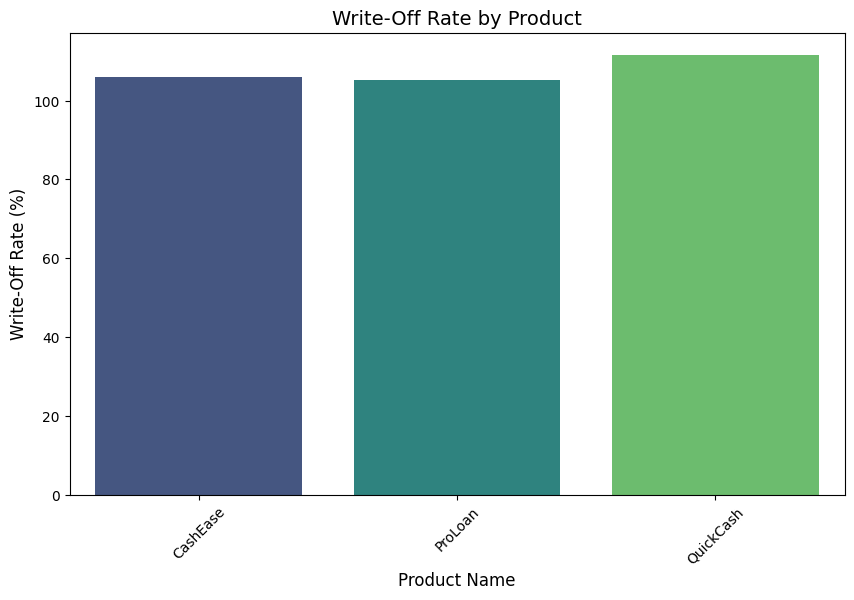

In [89]:
# Calculate Write-Off Rate by Product
write_off_by_product = filtered_loans.groupby('product_name').agg(
    total_outstanding=('total_outstanding', 'sum'),
    total_write_off=('write_off_amount', 'sum')
).reset_index()

write_off_by_product['write_off_rate'] = (
    write_off_by_product['total_write_off'] / write_off_by_product['total_outstanding']
) * 100

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=write_off_by_product, x='product_name', y='write_off_rate', palette='viridis')
plt.title('Write-Off Rate by Product', fontsize=14)
plt.ylabel('Write-Off Rate (%)', fontsize=12)
plt.xlabel('Product Name', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [36]:
write_off_by_product['write_off_rate']

,write_off_rate
0,106.037098
1,105.100127
2,111.589057


2.   **Collections Rate**
     *   Definition: The percentage of the total loan principal collected relative to the total due.
     *   Formula:
            Collections Rate (%) = (Collected Amount/Total Due Amount)×100
     *   Handling Data Issues:
         *   Use the sum of payments as the collected amount.
         *   Exclude loans with missing payment data.

In [37]:
total_collections = filtered_loans['principal_amount'].sum()
total_outstanding = filtered_loans['total_outstanding'].sum()

collections_rate = (total_collections / total_outstanding) * 100
print(f"Collections Rate: {collections_rate:.2f}%")

Collections Rate: 132.17%


* Interpretation: Collections exceeded the total outstanding amounts, which could be due to:
    *   Penalties, fees, or other payments collected above the principal amounts.
    *   Prepaid loans or additional repayments made by borrowers.
* Recommendation:
    *   Verify the calculation methodology to ensure consistency.
    *   Separate principal, interest, and penalty collections in reporting for clarity.


3.   **Gross Yield**
     *   Definition: The income generated (e.g., interest) as a percentage of the total loan principal issued.
     *   Formula:
            Gross Yield (%) = (Interest Collected/total Principal Balance)×100
     *   Handling Data Issues:
         *   Use the sum of payments marked as interest for the numerator.
         *   Estimate the portfolio balance from loan disbursement and repayment data.

In [38]:
total_interest_collected = (filtered_loans['interest_rate'] * filtered_loans['principal_amount']).sum()

# Calculate the total interest and fees (sum of interest rate applied to principal + any penalties or fees)
total_interest_and_fees = (filtered_loans['principal_amount'] * filtered_loans['interest_rate']).sum() + filtered_loans['penalties'].sum() + filtered_loans['fees'].sum()

# Calculate the total principal amount (sum of all principal amounts)
total_principal = filtered_loans['principal_amount'].sum()

# Calculate Gross Yield
gross_yield = (total_interest_and_fees / total_principal) * 100
print(f"Gross Yield: {gross_yield:.2f}%")

Gross Yield: 30.49%


* Interpretation: The portfolio generates a healthy return on the principal through interest and associated fees.
* Possible Causes:
    *   High-interest loans.
    *   Effective interest collection strategies for performing loans.
* Recommendation:
    *   Evaluate whether the high yield compensates for the high write-off rate.
    *   Diversify the portfolio to reduce dependency on high-interest loans, which may lead to higher defaults.


4.   **Average Days in Arrear**s
     *   Definition: The average number of days that overdue payments remain outstanding.
     *   Formula:
         *      Identify the arrears date: You need to calculate how long the loan has been overdue. If a loan is in default, you can use the default_date. If it has been written off, use the write_off_date. Otherwise, you may use the as_of_datetime to see how long the loan has been past due.
         *   Calculate the number of days in arrears: This is done by subtracting the maturity_date or default_date from the as_of_datetime or write_off_date.
         *   Calculate the average: The average number of days in arrears is the mean of all individual loans' days in arrears.

In [39]:
# Assuming 'filtered_loans' is your DataFrame and 'as_of_datetime' is in datetime format
filtered_loans['as_of_datetime'] = pd.to_datetime(filtered_loans['as_of_datetime'])

# Calculate days in arrears
def calculate_days_in_arrears(row):
    if pd.notna(row['default_date']):
        arrears_date = pd.to_datetime(row['default_date'])
    elif pd.notna(row['write_off_date']):
        arrears_date = pd.to_datetime(row['write_off_date'])
    else:
        # Use 'maturity_date' if no default or write-off date exists
        arrears_date = pd.to_datetime(row['maturity_date'])

    # Calculate the difference between 'as_of_datetime' and arrears date
    days_in_arrears = (row['as_of_datetime'] - arrears_date).days

    return max(days_in_arrears, 0)  # Avoid negative days in arrears

# Apply the function to calculate days in arrears for each loan
filtered_loans['days_in_arrears'] = filtered_loans.apply(calculate_days_in_arrears, axis=1)

# Calculate the average days in arrears
average_days_in_arrears = filtered_loans['days_in_arrears'].mean()

<ipython-input-39-c9d6ee6340e9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_loans['as_of_datetime'] = pd.to_datetime(filtered_loans['as_of_datetime'])
<ipython-input-39-c9d6ee6340e9>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_loans['days_in_arrears'] = filtered_loans.apply(calculate_days_in_arrears, axis=1)


In [40]:
# Output the result
print(f"Average Days in Arrears: {average_days_in_arrears:.2f}")

Average Days in Arrears: 858.44


* Interpretation: Loans are, on average, overdue by 858.44 days (approximately 2.35 years). This indicates severe challenges in loan repayment timelines, with many borrowers unable to meet deadlines for extended periods.
* Recommendation:
    *   Introduce stricter repayment monitoring to reduce delays.
    *   Offer restructuring options for long-overdue loans to recover at least part of the outstanding amounts.
    *   Analyze arrears trends by borrower type or loan product to identify underlying issues.


**Portfolio At Risk (PAR)**

Measures the percentage of the loan portfolio at risk of default, typically loans overdue by more than 854 days

In [41]:
# Convert 'as_of_datetime' and 'maturity_date' to datetime if they are not already
filtered_loans['as_of_datetime'] = pd.to_datetime(filtered_loans['as_of_datetime'], errors='coerce')
filtered_loans['maturity_date'] = pd.to_datetime(filtered_loans['maturity_date'], errors='coerce')

# Define threshold for PAR calculation (e.g., loans overdue > 854 days)
par_threshold = 854

# Calculate loans at risk
loans_at_risk = filtered_loans[
    (filtered_loans['as_of_datetime'] - filtered_loans['maturity_date']).dt.days > par_threshold
]

# Calculate Portfolio At Risk
par = (loans_at_risk['principal_amount'].sum() / filtered_loans['principal_amount'].sum()) * 100

<ipython-input-41-822d31c4f653>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_loans['as_of_datetime'] = pd.to_datetime(filtered_loans['as_of_datetime'], errors='coerce')
<ipython-input-41-822d31c4f653>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_loans['maturity_date'] = pd.to_datetime(filtered_loans['maturity_date'], errors='coerce')


Measures the quality of the portfolio and the level of risk associated with late payments.

In [42]:
print(f"Portfolio At Risk (PAR): {par:.2f}%")

Portfolio At Risk (PAR): 33.02%


**Recovery Rate**

Measures how much of the written-off amount has been recovered.

In [43]:
# Filter recoveries from payment data
recovery_payments = filtered_payments[filtered_payments['type'] == 'RECOVERIES']

recovery_payments['payment_date'] = pd.to_datetime(recovery_payments['payment_date'], errors='coerce')

# Add payment month
recovery_payments['payment_month'] = recovery_payments['payment_date'].dt.to_period('M')

# Group by payment month to calculate total recoveries for each month
monthly_recoveries = recovery_payments.groupby('payment_month').agg(
    total_recoveries=('amount', 'sum')
).reset_index()

# Calculate total recoveries
total_recoveries = recovery_payments['amount'].sum()

# Ensure write_off_amount is not NaN
filtered_loans['write_off_amount'] = filtered_loans['write_off_amount'].fillna(0)

# Add month column to loans to group by month
filtered_loans['write_off_month'] = filtered_loans['write_off_date'].dt.to_period('M')

# Group by month to calculate total write-offs for each month
monthly_write_offs = filtered_loans.groupby('write_off_month').agg(
    total_write_offs=('write_off_amount', 'sum')
).reset_index()

# Merge the DataFrames
monthly_recoveries.rename(columns={'payment_month': 'payment_month'}, inplace=True)
monthly_write_offs.rename(columns={'write_off_month': 'payment_month'}, inplace=True)

# Merge the recovery and write-off data on the payment month (same as write-off month)
monthly_recovery_data = pd.merge(monthly_recoveries, monthly_write_offs, on='payment_month', how='inner')

# Calculate the recovery rate for each month
monthly_recovery_data['recovery_rate'] = (monthly_recovery_data['total_recoveries'] / monthly_recovery_data['total_write_offs']) * 100

# Calculate total write-offs
total_write_offs = filtered_loans['write_off_amount'].sum()

# Calculate Recovery Rate
recovery_rate = (total_recoveries / total_write_offs) * 100 if total_write_offs > 0 else 0

<ipython-input-43-928d20247354>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recovery_payments['payment_date'] = pd.to_datetime(recovery_payments['payment_date'], errors='coerce')
<ipython-input-43-928d20247354>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recovery_payments['payment_month'] = recovery_payments['payment_date'].dt.to_period('M')
<ipython-input-43-928d20247354>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [44]:
print(f"Recovery Rate: {recovery_rate:.2f}%")

Recovery Rate: 0.04%


**Penalty Rate**

The average penalties incurred as a percentage of the total principal amount.

In [45]:
# Calculate Penalty Rate
penalty_rate = (filtered_loans['penalties'].sum() / filtered_loans['principal_amount'].sum()) * 100

Helps assess how much penalties contribute to the overall loan portfolio.

In [46]:
print(f"Penalty Rate: {penalty_rate:.2f}%")

Penalty Rate: 3.60%


**Active Loans**

The count and total amount of loans that are still active (i.e., not closed).

In [47]:
# Filter active loans
active_loans = filtered_loans[filtered_loans['closing_date'].isna()]

# Count and total amount of active loans
active_loan_count = active_loans['loan_id'].nunique()
active_loan_total = active_loans['principal_amount'].sum()
print(f"Active Loans: {active_loan_count} loans, Total Amount: {active_loan_total:.2f}")

Active Loans: 21 loans, Total Amount: 2727060.00


**Loan Concentration by Borrower**

Identifies borrowers with the highest outstanding balances.

In [48]:
# Group by borrower and calculate total outstanding
borrower_concentration = filtered_loans.groupby('borrower_id')['total_outstanding'].sum().sort_values(ascending=False).head(10)

print("Top 10 Borrowers by Outstanding Balance:")
print(borrower_concentration)


Top 10 Borrowers by Outstanding Balance:
borrower_id
vudfs1vfmtqxndq=    32100000.0
vudfs1vfmtk0nzi=    28000000.0
vudfvvbfndgxma==    25950000.0
vudfs1vfmteyodi=    25450000.0
vudfvvbfmjm4mja=    23740000.0
vudfs1vfmjazmju=    23600000.0
vudfvvbfmjuzmtu=    23130000.0
vudfs1vfmtc4mtg=    22400000.0
vudfs1vfmjewote=    22250000.0
vudfvvbfmtgwmtq=    21560000.0
Name: total_outstanding, dtype: float64


**Loan Repayment Rate**

The percentage of loans fully repaid by their maturity date.

In [49]:
# Fully repaid loans
fully_repaid_loans = filtered_loans[(filtered_loans['total_outstanding'] == 0) & (filtered_loans['closing_date'] <= filtered_loans['maturity_date'])]

# Calculate Repayment Rate
repayment_rate = (fully_repaid_loans['principal_amount'].sum() / filtered_loans['principal_amount'].sum()) * 100

Tracks the current size of the loan portfolio.

In [50]:
print(f"Loan Repayment Rate: {repayment_rate:.2f}%")

Loan Repayment Rate: 12.21%


**Default Rate**

It’s a critical measure of portfolio risk, showing the fraction of loans where borrowers failed to meet repayment obligations

In [51]:
# 1. Filter for Defaulted Loans
filtered_loans['default_date'] = pd.to_datetime(filtered_loans['default_date'], errors='coerce')  # Convert to datetime
default_loans = filtered_loans[filtered_loans['default_date'].notna()]

# 2. Extract the Month and Year from the default date
default_loans['default_month'] = default_loans['default_date'].dt.to_period('M')

# 3. Group by Month to calculate monthly defaults
monthly_defaults = default_loans.groupby('default_month').size().reset_index(name='defaults')

# 4. Calculate the Total Loans (constant, as the dataset is filtered)
total_loans = len(filtered_loans)

# 5. Calculate Default Rate per Month
monthly_defaults['default_rate'] = (monthly_defaults['defaults'] / total_loans) * 100

default_rate = (len(default_loans) / total_loans) * 100

<ipython-input-51-c54f83f2368b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_loans['default_date'] = pd.to_datetime(filtered_loans['default_date'], errors='coerce')  # Convert to datetime
<ipython-input-51-c54f83f2368b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  default_loans['default_month'] = default_loans['default_date'].dt.to_period('M')


All default loans are on ''2022-09''

In [103]:
default_loans['default_month'].unique()

<PeriodArray>
['2022-09']
Length: 1, dtype: period[M]

In [52]:
print(f"Default Rate: {default_rate:.2f}%")

Default Rate: 0.01%


*   A look at the Write-Off Rate 105.99% compared to the Default Rate 0.01%. This large gap suggests loans are being written off without triggering default status.
*   A low default rate combined with a recovery rate 0.04% could indicate the portfolio is facing challenges in recovering written-off loans.





In [53]:
default_rate_by_product = (
    filtered_loans.groupby('product_name')['default_date']
    .apply(lambda x: x.notna().sum() / len(x) * 100)
)
print(default_rate_by_product)

product_name
CashEase     0.000000
ProLoan      0.068178
QuickCash    0.000000
Name: default_date, dtype: float64


A default rate of 0.01% might be extremely low for a portfolio containing riskier loan types, but if it’s a high-quality loan book with conservative underwriting, this could be in line with expectations.

**Delinquency Rate**

* Identify loans that are overdue but not yet defaulted or written off.
  * Calculate overdue loans based on the maturity_date and compare it to the as_of_datetime (the current snapshot date).
  * Filter loans where the default_date or write_off_date is not yet populated.
* Calculate the number of delinquent loans:
  * A loan can be delinquent if it has passed its maturity_date but has neither default_date nor write_off_date.
* Calculate the Delinquency Rate:
  * Delinquency Rate= Number of Delinquent Loans​/Total Number of Loans ×100

In [54]:
# Assuming 'filtered_loans' is your dataset
# Step 1: Ensure you have necessary columns and convert dates to datetime
filtered_loans['maturity_date'] = pd.to_datetime(filtered_loans['maturity_date'])
filtered_loans['default_date'] = pd.to_datetime(filtered_loans['default_date'])
filtered_loans['write_off_date'] = pd.to_datetime(filtered_loans['write_off_date'])
filtered_loans['as_of_datetime'] = pd.to_datetime(filtered_loans['as_of_datetime'])

# Step 2: Define delinquent loans
delinquent_loans = filtered_loans[
    (filtered_loans['maturity_date'] < filtered_loans['as_of_datetime']) &  # Loan is overdue
    (filtered_loans['default_date'].isna()) &  # No default date
    (filtered_loans['write_off_date'].isna())  # No write-off date
]

# We will create a new column to mark each loan as delinquent or not based on its maturity date
filtered_loans['is_delinquent'] = (filtered_loans['maturity_date'] < filtered_loans['as_of_datetime']) & \
                                  (filtered_loans['default_date'].isna()) & \
                                  (filtered_loans['write_off_date'].isna())

# Step 3: Calculate the Delinquency Rate
total_loans = len(filtered_loans)
delinquent_loans_count = len(delinquent_loans)

payments['payment_date'] = pd.to_datetime(payments['payment_date'])

# Group payments by month (you can change the period to 'quarter' or 'year' if needed)
payments['payment_month'] = payments['payment_date'].dt.to_period('M')

# Create a dataframe to track delinquent loans over time
delinquent_loans_over_time = payments.groupby('payment_month').apply(
    lambda x: (filtered_loans['is_delinquent'] & filtered_loans['loan_id'].isin(x['loan_id'])).sum()
).reset_index(name='delinquent_loans')

# Step 4: Calculate total loans at each period
total_loans_over_time = payments.groupby('payment_month').apply(
    lambda x: len(filtered_loans[filtered_loans['loan_id'].isin(x['loan_id'])])
).reset_index(name='total_loans')

# Merge delinquent loans and total loans
delinquency_data = pd.merge(delinquent_loans_over_time, total_loans_over_time, on='payment_month')

# Step 5: Calculate delinquency rate per period
delinquency_data['delinquency_rate'] = (delinquency_data['delinquent_loans'] / delinquency_data['total_loans']) * 100

delinquency_rate = (delinquent_loans_count / total_loans) * 100

<ipython-input-54-0fdabb907ad6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_loans['maturity_date'] = pd.to_datetime(filtered_loans['maturity_date'])
<ipython-input-54-0fdabb907ad6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_loans['default_date'] = pd.to_datetime(filtered_loans['default_date'])
<ipython-input-54-0fdabb907ad6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [55]:
# Output the delinquency rate
print(f"Delinquency Rate: {delinquency_rate:.2f}%")

Delinquency Rate: 14.84%


*   A higher delinquency rate paired with a higher write-off rate can be an indication of poor portfolio performance
*   The Default Rate of 0.01% is extremely low. Typically, this rate should be higher if the delinquency rate is high, unless you're recovering a significant portion of the overdue amounts or restructuring loans.
*   The recovery rate of 0.04% is concerning, especially when paired with high delinquency and write-off rates.



## Other metrics/visualizations that might be valuable beyond the key metrics.

**Loan Aging Distribution (Aging Buckets)**

Visualizing how loans are distributed across different aging buckets (e.g., 90 days, 180 days, 270 days past due) can help identify the overall portfolio’s risk and trend of delinquencies.

In [56]:
# Create aging buckets
aging_buckets = {
    '0-180 Days': filtered_loans[filtered_loans['days_in_arrears'] <= 180],
    '181-360 Days': filtered_loans[(filtered_loans['days_in_arrears'] > 180) & (filtered_loans['days_in_arrears'] <= 360)],
    '361-540 Days': filtered_loans[(filtered_loans['days_in_arrears'] > 360) & (filtered_loans['days_in_arrears'] <= 540)],
    '541-720 Days': filtered_loans[(filtered_loans['days_in_arrears'] > 540) & (filtered_loans['days_in_arrears'] <= 720)],
    '721-900 Days': filtered_loans[(filtered_loans['days_in_arrears'] > 720) & (filtered_loans['days_in_arrears'] <= 900)],
    '901-1080 Days': filtered_loans[(filtered_loans['days_in_arrears'] > 900) & (filtered_loans['days_in_arrears'] <= 1080)],
    '1081-1260 Days': filtered_loans[(filtered_loans['days_in_arrears'] > 1080) & (filtered_loans['days_in_arrears'] <= 1260)],
    '1261-1440 Days': filtered_loans[(filtered_loans['days_in_arrears'] > 1261) & (filtered_loans['days_in_arrears'] <= 1440)],
    '1440+ Days': filtered_loans[filtered_loans['days_in_arrears'] > 1440]
}

aging_distribution = {key: len(value) for key, value in aging_buckets.items()}

print(aging_distribution)


{'0-180 Days': 140720, '181-360 Days': 626546, '361-540 Days': 359862, '541-720 Days': 333762, '721-900 Days': 248037, '901-1080 Days': 178362, '1081-1260 Days': 113224, '1261-1440 Days': 139364, '1440+ Days': 562855}


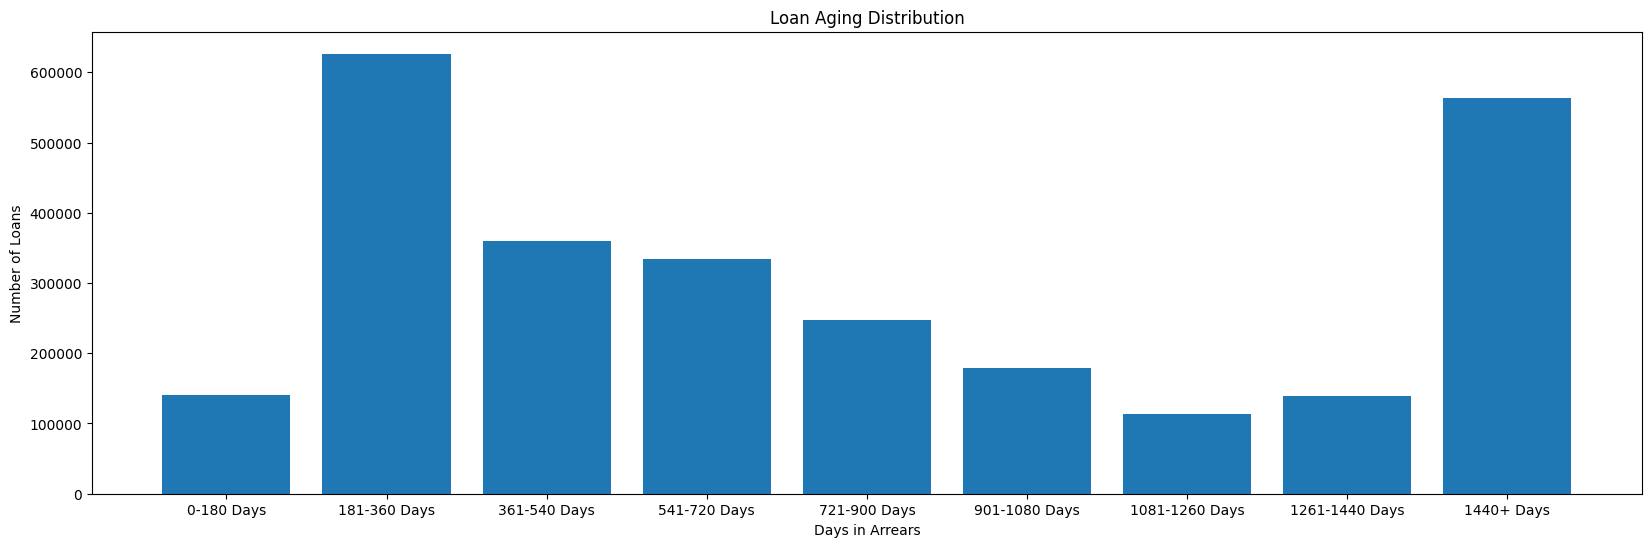

In [90]:
# Plot aging distribution with adjusted x-axis limits
plt.figure(figsize=(20, 6))  # Increase figure width
plt.bar(aging_distribution.keys(), aging_distribution.values())
plt.title("Loan Aging Distribution")
plt.xlabel("Days in Arrears")
plt.ylabel("Number of Loans")
plt.show()


**Loan Performance by Currency**

Analyze how loans denominated in different currencies are performing, focusing on metrics like delinquency rate, write-offs, and recovery rates.

In [58]:
delinquency_by_currency = filtered_loans.groupby('currency').apply(
    lambda x: (x['default_date'].notna().sum() / len(x)) * 100
)

delinquency_by_currency


<ipython-input-58-b02f940a4efe>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  delinquency_by_currency = filtered_loans.groupby('currency').apply(


,0
currency,
KES,0.008273
UGX,0.000000


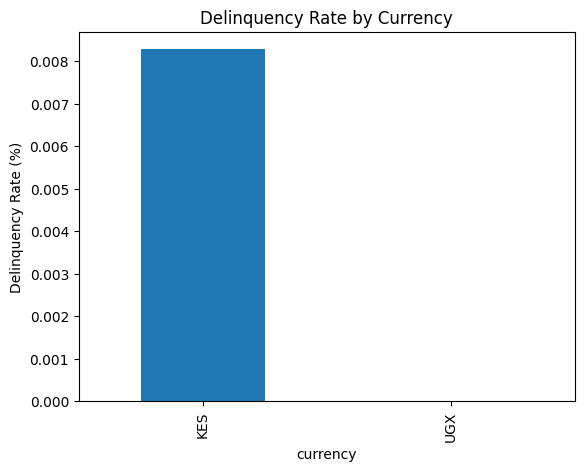

In [91]:
delinquency_by_currency.plot(kind='bar', title='Delinquency Rate by Currency', ylabel='Delinquency Rate (%)')
plt.show()

**Loan Balance Trend Over Time**

Visualize the total outstanding balance of loans over time to understand if there's an increasing trend in overdue loans.

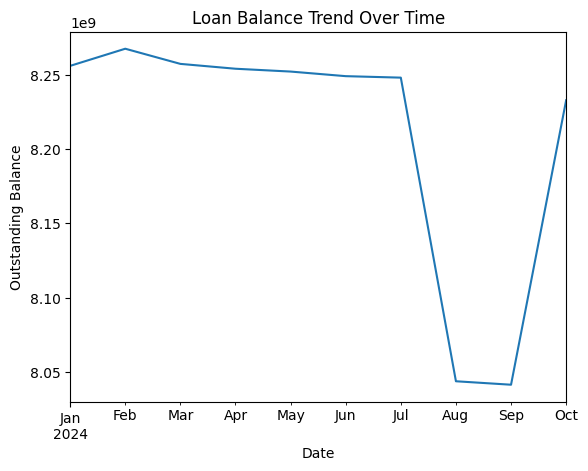

In [92]:
loan_balance_by_time = filtered_loans.groupby(filtered_loans['as_of_datetime'].dt.to_period('M'))['total_outstanding'].sum()

loan_balance_by_time.plot(title="Loan Balance Trend Over Time", xlabel="Date", ylabel="Outstanding Balance")
plt.show()

**Recovery vs write-off**

Visualize the write-off amount and recovery amount for each loan or for the overall portfolio, which could give insights into how well the lender is recovering written-off loans.

In [61]:
# Filter recoveries from the payment data
recovery_payments = filtered_payments[filtered_payments['type'] == 'RECOVERIES']

# Aggregate total recoveries
total_recoveries = recovery_payments['amount'].sum()

print(f"Total Recoveries: {total_recoveries}")


Total Recoveries: 31666276.0


In [62]:
# Merge recovery payments with loan data
recovery_data = pd.merge(recovery_payments, filtered_loans, on=['loan_id','currency'], how='inner')

# Display recovery data for analysis
recovery_data.head()


,payment_id,payment_date,loan_id,currency,amount,type,loan_missing,as_of_datetime,borrower_id,issue_date,...,default_amount,product_name,penalties,fees,total_outstanding,borrower_missing,write_off_rate,days_in_arrears,write_off_month,is_delinquent
0,U0M0MlhMVlYwRw==,2024-03-04,s0vfs1vfq0leszy3nq==,KES,400.0,RECOVERIES,False,2024-05-01,ogexotrimji4odm4mjfjmtaxodg0n2jlzwjhotzhytk=,2023-06-07,...,NaN,ProLoan,1003.0,0.0,8065.62,False,1.576521,214,2023-09,False
1,U0M0MlhMVlYwRw==,2024-03-04,s0vfs1vfq0leszy3nq==,KES,400.0,RECOVERIES,False,2024-02-01,ogexotrimji4odm4mjfjmtaxodg0n2jlzwjhotzhytk=,2023-06-07,...,NaN,ProLoan,1003.0,0.0,11065.62,False,1.149110,124,2023-09,False
2,U0M0MlhMVlYwRw==,2024-03-04,s0vfs1vfq0leszy3nq==,KES,400.0,RECOVERIES,False,2024-06-01,ogexotrimji4odm4mjfjmtaxodg0n2jlzwjhotzhytk=,2023-06-07,...,NaN,ProLoan,1003.0,0.0,8065.62,False,1.576521,245,2023-09,False
3,U0M0MlhMVlYwRw==,2024-03-04,s0vfs1vfq0leszy3nq==,KES,400.0,RECOVERIES,False,2024-10-01,ogexotrimji4odm4mjfjmtaxodg0n2jlzwjhotzhytk=,2023-06-07,...,NaN,ProLoan,1003.0,0.0,8065.62,False,1.576521,367,2023-09,False
4,U0M0MlhMVlYwRw==,2024-03-04,s0vfs1vfq0leszy3nq==,KES,400.0,RECOVERIES,False,2024-07-01,ogexotrimji4odm4mjfjmtaxodg0n2jlzwjhotzhytk=,2023-06-07,...,NaN,ProLoan,1003.0,0.0,8065.62,False,1.576521,275,2023-09,False


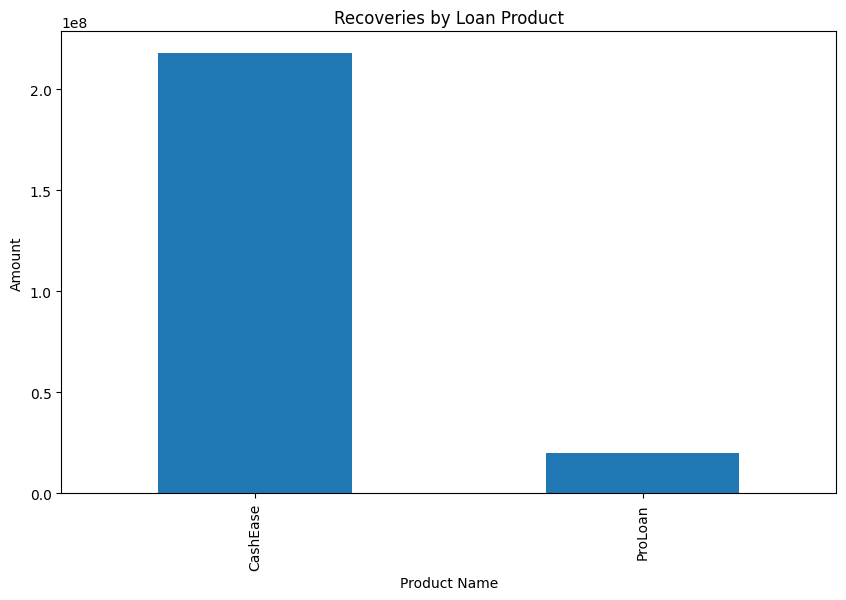

In [93]:
# Group recoveries by product_name
recoveries_by_product = recovery_data.groupby('product_name')['amount'].sum()

# Plot
recoveries_by_product.plot(kind='bar', title='Recoveries by Loan Product', ylabel='Amount', xlabel='Product Name', figsize=(10, 6))
plt.show()

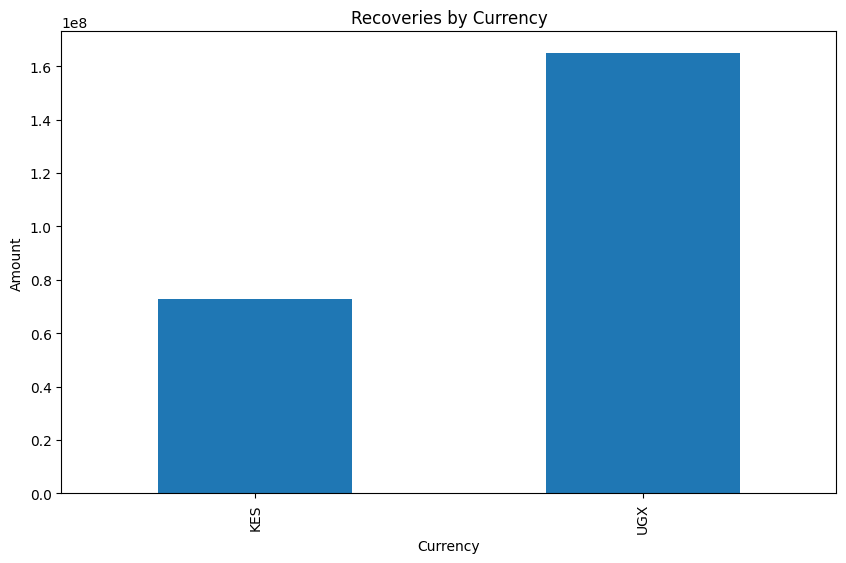

In [94]:
# Group recoveries by currency
recoveries_by_currency = recovery_data.groupby('currency')['amount'].sum()

# Plot
recoveries_by_currency.plot(kind='bar', title='Recoveries by Currency', ylabel='Amount', xlabel='Currency', figsize=(10, 6))
plt.show()

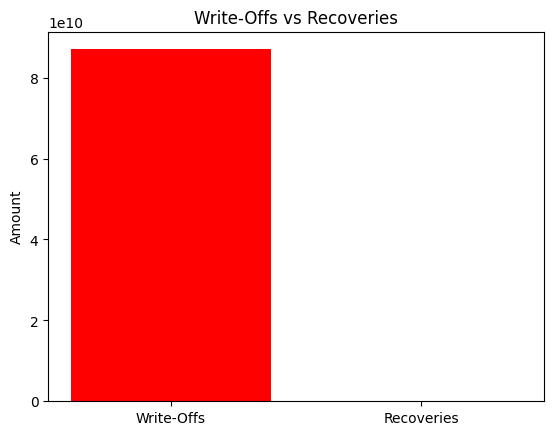

In [95]:
# Plot Write-Offs vs Recoveries
plt.bar(['Write-Offs', 'Recoveries'], [total_write_offs, total_recoveries], color=['red', 'green'])
plt.title("Write-Offs vs Recoveries")
plt.ylabel("Amount")
plt.show()

**Loan Size vs Default Rate**

Investigate if there’s a relationship between loan size and the likelihood of default. Larger loans may have a higher probability of default.

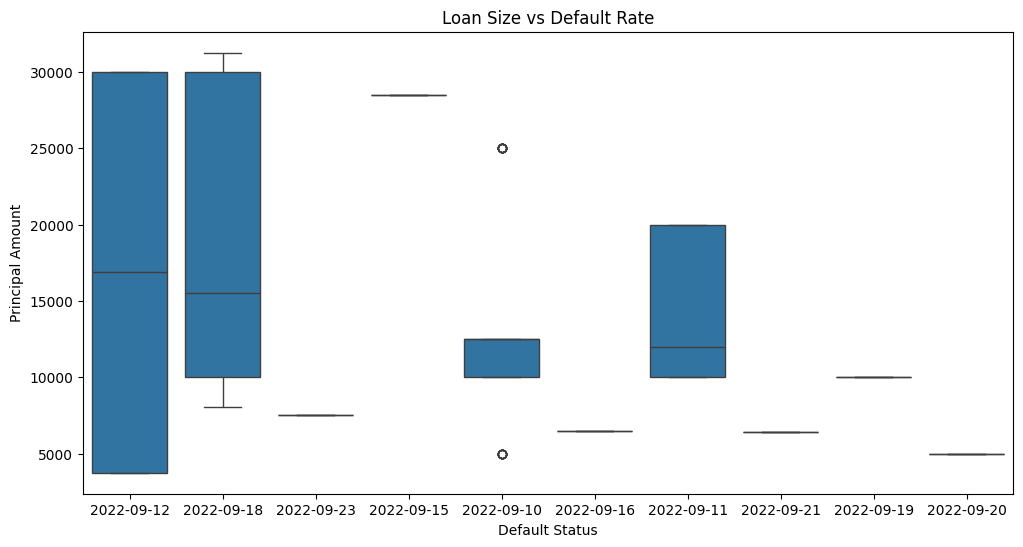

In [66]:
plt.figure(figsize=(12, 6))  # Increase figure width
sns.boxplot(x='default_date', y='principal_amount', data=filtered_loans)
plt.title('Loan Size vs Default Rate')
plt.xlabel('Default Status')
plt.ylabel('Principal Amount')
plt.show()

## Dashboard Portfolio performance metrics to the investment team

**Calculate Additional Metrics**

In [70]:
# Additional metrics
active_loans = filtered_loans[filtered_loans['write_off_amount'] == 0].shape[0]
total_outstanding = filtered_loans['total_outstanding'].sum()
write_off_amount = filtered_loans['write_off_amount'].sum()
loans_in_arrears = filtered_loans[filtered_loans['days_in_arrears'] > 0].shape[0]
average_loan_amount = filtered_loans['principal_amount'].mean()
total_fees_collected = filtered_loans['fees'].sum()
average_interest_rate = filtered_loans['interest_rate'].mean()

# Payment-related metrics
total_payments = payments['amount'].sum()
average_payment_amount = payments['amount'].mean()

# Join payments data to get payments over time
payments['payment_date'] = pd.to_datetime(payments['payment_date'])

# Assuming 'filtered_loans' is your dataset
# Step 1: Ensure you have necessary columns and convert dates to datetime
filtered_loans['maturity_date'] = pd.to_datetime(filtered_loans['maturity_date'])
filtered_loans['default_date'] = pd.to_datetime(filtered_loans['default_date'])
filtered_loans['write_off_date'] = pd.to_datetime(filtered_loans['write_off_date'])
filtered_loans['as_of_datetime'] = pd.to_datetime(filtered_loans['as_of_datetime'])
filtered_loans['default_month'] = filtered_loans['default_date'].dt.to_period('M')

# Step 2: Define delinquent loans
filtered_loans['is_delinquent'] = (filtered_loans['maturity_date'] < filtered_loans['as_of_datetime']) & \
                                  (filtered_loans['default_date'].isna()) & \
                                  (filtered_loans['write_off_date'].isna())

# Step 3: Calculate delinquency rate over time
# Group payments by month (you can change the period to 'quarter' or 'year' if needed)
payments['payment_month'] = payments['payment_date'].dt.to_period('M')

# Create a dataframe to track delinquent loans over time
delinquent_loans_over_time = payments.groupby('payment_month').apply(
    lambda x: (filtered_loans['is_delinquent'] & filtered_loans['loan_id'].isin(x['loan_id'])).sum()
).reset_index(name='delinquent_loans')

# Step 4: Calculate total loans at each period
total_loans_over_time = payments.groupby('payment_month').apply(
    lambda x: len(filtered_loans[filtered_loans['loan_id'].isin(x['loan_id'])])
).reset_index(name='total_loans')

# Merge delinquent loans and total loans
delinquency_data = pd.merge(delinquent_loans_over_time, total_loans_over_time, on='payment_month')

# Step 5: Calculate delinquency rate per period
delinquency_data['delinquency_rate'] = (delinquency_data['delinquent_loans'] / delinquency_data['total_loans']) * 100

# Calculate delinquency rate over time
filtered_loans['payment_month'] = filtered_loans['as_of_datetime'].dt.to_period('M')

# Calculate write-off rate over time
# Assuming filtered_loans has 'write_off_amount' and 'principal_amount' columns
write_off_over_time = filtered_loans.groupby(['payment_month', 'product_name']).agg(
    total_write_off_amount=('write_off_amount', 'sum'),
    total_loan_amount=('principal_amount', 'sum')
).reset_index()

# Calculate write-off rate for each product
write_off_over_time['write_off_rate'] = write_off_over_time['total_write_off_amount'] / write_off_over_time['total_loan_amount']

# Merge write-off rate and delinquency rate over time
writeoff_delinquency = pd.merge(delinquency_data, write_off_over_time, on=['payment_month'], how='outer')

# Prepare the data for the aging distribution graph (Bar chart or Pie chart)
aging_buckets_labels = list(aging_distribution.keys())
aging_buckets_counts = list(aging_distribution.values())


<ipython-input-70-4978f3ce4e8d>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-70-4978f3ce4e8d>:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-70-4978f3ce4e8d>:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-70-4978

In [71]:
writeoff_delinquency.head()

,payment_month,delinquent_loans,total_loans,delinquency_rate,product_name,total_write_off_amount,total_loan_amount,write_off_rate
0,2023-12,135.0,11581.0,1.165702,NaN,NaN,NaN,NaN
1,2024-01,117.0,8519.0,1.373401,CashEase,8.291128e+09,2.161352e+10,0.383608
2,2024-01,117.0,8519.0,1.373401,ProLoan,4.584773e+08,3.826121e+09,0.119828
3,2024-01,117.0,8519.0,1.373401,QuickCash,4.612881e+04,1.219750e+05,0.378182
4,2024-02,151.0,12940.0,1.166924,CashEase,8.285910e+09,8.124248e+09,1.019899


In [72]:
# Step 1: Merge the payments and loans dataframes on loan_id
merged_data = pd.merge(payments, loans, on='loan_id')

# Step 2: Extract the month and year from payment_date
merged_data['payment_month'] = merged_data['payment_date'].dt.to_period('M')

fully_repaid_loans['closing_date'] = pd.to_datetime(fully_repaid_loans['closing_date'], errors='coerce', dayfirst=True)

# Extract the payment month or time period from the closing date
fully_repaid_loans['repayment_month'] = fully_repaid_loans['closing_date'].dt.to_period('M')

# Step 3: # Group by repayment month and calculate the total amount repaid for fully repaid loans
repayment_data = fully_repaid_loans.groupby('repayment_month').agg(
    total_repaid=('principal_amount', 'sum')
).reset_index()

# Calculate the total principal amount for all loans to use in the repayment rate formula
total_principal_amount = filtered_loans['principal_amount'].sum()

# Calculate the repayment rate for each month (or period)
repayment_data['repayment_rate'] = (repayment_data['total_repaid'] / total_principal_amount) * 100


<ipython-input-72-63e044d8cd0d>:7: UserWarning:

Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.

<ipython-input-72-63e044d8cd0d>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-72-63e044d8cd0d>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [73]:
# Assuming you already have the 'filtered_loans' dataframe, you will now group by 'product_name'
loan_performance_by_product = filtered_loans.groupby('product_name').agg(
    total_loans=('loan_id', 'count'),  # Total number of loans per product
    total_outstanding=('total_outstanding', 'sum'),  # Total outstanding amount per product
    average_interest_rate=('interest_rate', 'mean'),  # Average interest rate per product
    average_loan_amount=('principal_amount', 'mean')  # Average loan amount per product
).reset_index()

In [74]:
loan_performance_by_product

,product_name,total_loans,total_outstanding,average_interest_rate,average_loan_amount
0,CashEase,2394596,7.773972e+10,0.279422,39340.765697
1,ProLoan,308015,4.363409e+09,0.063687,46451.461329
2,QuickCash,121,5.400267e+05,0.160000,15229.958678


In [75]:
# Convert 'date_of_birth' to datetime format
# Attempt to convert the 'date_of_birth' to datetime, invalid dates will become NaT
borrowers['date_of_birth'] = pd.to_datetime(borrowers['date_of_birth'], errors='coerce', dayfirst=True)

# Check rows with invalid dates
invalid_dates = borrowers[borrowers['date_of_birth'].isna()]
if not invalid_dates.empty:
    print("Rows with invalid dates:")
    print(invalid_dates)

# Remove rows with invalid dates
borrowers = borrowers.dropna(subset=['date_of_birth'])

# Optional: Ensure that all dates are after a reasonable threshold (e.g., no dates before 1900)
borrowers = borrowers[borrowers['date_of_birth'] >= pd.to_datetime('1900-01-01')]

# Calculate the age of each borrower
current_date = pd.to_datetime('today')
borrowers['age'] = (current_date - borrowers['date_of_birth']).dt.days // 365

# Create Age Groups (e.g., 18-30, 31-40, etc.)
borrowers['age_group'] = pd.cut(borrowers['age'], bins=[0, 30, 40, 50, 60, 100],
                                labels=['18-30', '31-40', '41-50', '51-60', '60+'])

# Segmentation by gender (male, female, other)
borrowers['gender_group'] = borrowers['gender'].apply(lambda x: 'Male' if x == 'M' else ('Female' if x == 'F' else 'Other'))

# Segment by country
borrowers['country_group'] = borrowers['country']  # Or create custom bins based on countries


Rows with invalid dates:
              as_of_datetime               borrower_id  gender country  \
0        2024-01-01 00:00:00  s0vfs1vfmju0nzixmjg3njc0    Male   Kenya   
4        2024-01-01 00:00:00  s0vfs1vfmju0nzi1mzm5odmx    Male   Kenya   
5        2024-01-01 00:00:00  s0vfs1vfwuvtnziymzc1otc4    Male   Kenya   
6        2024-01-01 00:00:00  s0vfs1vfwuvtnzizntcwntc1    Male   Kenya   
7        2024-01-01 00:00:00  s0vfs1vfwuvtnzi5nta5mje3    Male   Kenya   
...                      ...                       ...     ...     ...   
4282089  2024-10-01 00:00:00          s0vfvvbfnza1ntm1  Female   Kenya   
4282090  2024-10-01 00:00:00          s0vfvvbfnzaznze1  Female   Kenya   
4282092  2024-10-01 00:00:00          s0vfvvbfnza3ntgy  Female   Kenya   
4282094  2024-10-01 00:00:00          s0vfvvbfnjawodqz    Male   Kenya   
4282095  2024-10-01 00:00:00          s0vfvvbfnjc3mtky  Female   Kenya   

        geo_classification date_of_birth  
0                      NaN           NaT  


In [76]:
# Segmenting loan performance by age group
loan_data = pd.merge(filtered_loans[:1000000], borrowers[:1000000], on='borrower_id', how='inner')  # Merge loan data with borrower data

# Group by Age Group and calculate the performance metrics
performance_by_age = loan_data.groupby('age_group').agg({
    'loan_id': 'count',  # Total number of loans per age group
    'default_date': lambda x: x.notna().sum(),  # Count of defaults
    'total_outstanding': 'sum',  # Total repayment-like amount
    'principal_amount': 'sum',  # Total loan amount
    'write_off_amount': 'sum'  # Total write-off amount
})

# Count defaults: non-NaT values in 'default_date'
performance_by_age['default_count'] = performance_by_age['default_date'].notna().astype(int)

# Calculate Default Rate, Repayment Rate, Write-Off Rate
performance_by_age['default_rate'] = (performance_by_age['default_count'] / performance_by_age['loan_id']) * 100
performance_by_age['repayment_rate'] = (performance_by_age['total_outstanding'] / performance_by_age['principal_amount']) * 100
performance_by_age['write_off_rate'] = (performance_by_age['write_off_amount'] / performance_by_age['principal_amount']) * 100

# Display the results for different age groups
print(performance_by_age)


<ipython-input-76-f78cd9ec4b25>:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



           loan_id  default_date  total_outstanding  principal_amount  \
age_group                                                               
18-30       274825             0       8.319434e+09      9.568262e+09   
31-40       873419             0       2.349629e+10      2.770509e+10   
41-50       697649             0       1.806040e+10      2.276943e+10   
51-60       764500             0       1.969572e+10      2.468323e+10   
60+         138899             0       2.458620e+09      3.432058e+09   

           write_off_amount  default_count  default_rate  repayment_rate  \
age_group                                                                  
18-30          8.637601e+09              1      0.000364       86.948230   
31-40          2.467586e+10              1      0.000114       84.808588   
41-50          1.942713e+10              1      0.000143       79.318620   
51-60          2.147986e+10              1      0.000131       79.793937   
60+            2.737440e+09     

**Create Dash App Layout**

In [99]:
# Initialize the app object here
app = dash.Dash(__name__)

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1("Loan Portfolio Dashboard", style={'textAlign': 'center'}),

    # Rates Graph (Metrics in Percentage)
    dcc.Graph(
        id='rates-graph',
        figure={
            'data': [
                go.Bar(
                    x=['Write-Off Rate', 'Collections Rate', 'Gross Yield', 'Average Days in Arrears', 'Portfolio At Risk',
                       'Recovery Rate', 'Penalty Rate', 'Loan Repayment Rate'],
                    y=[write_off_rate, collections_rate, gross_yield, average_days_in_arrears, par,
                       recovery_rate, penalty_rate, repayment_rate],
                    marker_color='rgb(26, 118, 255)'
                ),
            ],
            'layout': go.Layout(
                title='Key Portfolio Performance Metrics',
                xaxis={'title': 'Metric'},
                yaxis={'title': 'Percentage (%) or Count'},
                showlegend=False
            )
        }
    ),

    # Amount/Count Graph (Metrics in Amounts or Counts)
    dcc.Graph(
        id='amounts-graph',
        figure={
            'data': [
                go.Bar(
                    x=['Total Outstanding', 'Write-Off Amount', 'Loans in Arrears', 'Active Loans', 'Total Fees Collected',
                       'Average Loan Amount', 'Total Interest Collected'],
                    y=[total_outstanding, write_off_amount, loans_in_arrears, active_loans, total_fees_collected,
                       average_loan_amount, total_interest_collected],
                    marker_color='rgb(0, 204, 102)'
                ),
            ],
            'layout': go.Layout(
                title='Key Portfolio Performance Metrics (Amounts & Counts)',
                xaxis={'title': 'Metric'},
                yaxis={'title': 'Amount (in currency units) or Count'},
                showlegend=False
            )
        }
    ),

    # Summary Section
    html.Div([
        html.H3("Portfolio Summary Metrics", style={'textAlign': 'center'}),
        dash_table.DataTable(
            id='summary-metrics-table',
            columns=[
                {"name": "Metric", "id": "metric"},
                {"name": "Value", "id": "value"},
            ],
            data=[
                {"metric": "Total Active Loans", "value": round(active_loans, 2)},
                {"metric": "Default Rate", "value": f"{round(default_rate, 5)}%"},
                {"metric": "Portfolio At Risk", "value": f"{round(par, 2)}%"},
                {"metric": "Loan Repayment Rate", "value": f"{round(repayment_rate, 2)}%"},
                {"metric": "Total Outstanding", "value": round(total_outstanding, 2)},
                {"metric": "Write-Off Amount", "value": round(write_off_amount, 2)},
                {"metric": "Loans in Arrears", "value": round(loans_in_arrears, 2)},
                {"metric": "Average Loan Amount", "value": round(average_loan_amount, 2)},
                {"metric": "Total Fees Collected", "value": round(total_fees_collected, 2)},
                {"metric": "Average Interest Rate", "value": f"{round(average_interest_rate, 2)}%"},
            ],
            style_table={'width': '80%', 'margin': 'auto'},
            style_cell={'textAlign': 'center', 'padding': '10px'},
            style_header={'backgroundColor': '#f9f9f9', 'fontWeight': 'bold'},
        )
    ], style={'padding': '20px'}),

    # Additional Metrics / Trends Section
    html.Div([
        html.H3("Payment Insights"),
        html.P(f"Total Payments Made: {round(total_payments, 0)}"),
        html.P(f"Average Payment Amount: {round(average_payment_amount, 0)}"),

        html.H3("Loan Aging and Delinquency"),
        html.P(f"Delinquency Rate: {round(delinquency_rate, 2)}%"),

        # Delinquency Rate Trace (Red)
        dcc.Graph(
            id='delinquency-rate',
            figure={
                'data': [
                    # Repayment Rate Trace (Green)
                    go.Scatter(
                        x=repayment_data['repayment_month'].astype(str),
                        y=repayment_data['repayment_rate'],
                        mode='lines+markers',
                        name='Repayment Rate',
                        marker=dict(color='rgb(34, 139, 34)')  # Green color for repayment rate
                    ),

                    # Recovery Rate Over Time
                    go.Scatter(
                        x=monthly_recovery_data['payment_month'].astype(str),
                        y=monthly_recovery_data['recovery_rate'],
                        mode='lines+markers',
                        name='Recovery Rate',
                        marker=dict(color='rgb(0, 0, 255)')
                    ),

                    # Delinquency Rate Trace (Red)
                    go.Scatter(
                        x=delinquency_data['payment_month'].astype(str),
                        y=delinquency_data['delinquency_rate'],
                        mode='lines+markers',
                        marker=dict(color='rgb(255, 99, 71)'),
                        name='Delinquency Rate'
                    ),
                ],
                'layout': go.Layout(
                    title='Repayment Rate and Delinquency Rate Over Time',
                    xaxis={'title': 'Month'},
                    yaxis={'title': 'Rate (%)'},
                    showlegend=True  # Display legend for both metrics
                )
            }
        ),

        # Aging Distribution Graph (Bar chart for loan aging buckets)
        dcc.Graph(
            id='aging-distribution',
            figure={
                'data': [
                    go.Bar(
                        x=aging_buckets_labels,
                        y=aging_buckets_counts,
                        name='Loan Aging Distribution',
                        marker=dict(color='rgb(255, 165, 0)')  # Orange color for aging buckets
                    ),
                ],
                'layout': go.Layout(
                    title='Loan Aging Distribution (Aging Buckets)',
                    xaxis={'title': 'Aging Bucket'},
                    yaxis={'title': 'Number of Loans'},
                    showlegend=False
                )
            }
        )
    ], style={'padding': '20px', 'backgroundColor': '#f9f9f9', 'marginTop': '20px'}),

    # Loan Performance Metrics Graph for Age Groups
    dcc.Graph(
        id='loan-performance-by-age',
        figure={
            'data': [
                go.Bar(
                    x=performance_by_age.index,
                    y=performance_by_age['default_rate'],
                    name='Default Rate',
                    marker=dict(color='rgb(255, 0, 0)')
                ),
                go.Bar(
                    x=performance_by_age.index,
                    y=performance_by_age['repayment_rate'],
                    name='Repayment Rate',
                    marker=dict(color='rgb(34, 139, 34)')
                ),
                go.Bar(
                    x=performance_by_age.index,
                    y=performance_by_age['write_off_rate'],
                    name='Write-Off Rate',
                    marker=dict(color='rgb(0, 0, 255)')
                ),
            ],
            'layout': go.Layout(
                title="Loan Performance by Age Group",
                xaxis={'title': 'Age Group'},
                yaxis={'title': 'Rate (%)'},
                barmode='group',  # Group the bars by segment
                showlegend=True
            )
        }
    ),

    # Loan Performance by Product Type
    dcc.Graph(
        id='loan-performance-by-product',
        figure={
            'data': [
                go.Bar(
                    x=loan_performance_by_product['product_name'],
                    y=loan_performance_by_product['total_loans'],
                    name='Total Loans',
                    marker=dict(color='rgb(0, 204, 102)')
                ),
                go.Bar(
                    x=writeoff_delinquency['product_name'],
                    y=writeoff_delinquency['delinquency_rate'],
                    name='Delinquency Rate',
                    marker=dict(color='rgb(255, 0, 255)')
                ),
                go.Bar(
                    x=writeoff_delinquency['product_name'],
                    y=writeoff_delinquency['write_off_rate'],
                    name='Write-off Rate',
                    marker=dict(color='rgb(34, 139, 34)')
                ),
                go.Bar(
                    x=loan_performance_by_product['product_name'],
                    y=loan_performance_by_product['total_outstanding'],
                    name='Total Outstanding Amount',
                    marker=dict(color='rgb(26, 118, 255)')
                ),
            ],
            'layout': go.Layout(
                title="Loan/Rate Performance by Product Type",
                xaxis={'title': 'Product Type'},
                yaxis={'title': 'Amount or Rate'},
                barmode='group',  # Display bars grouped by product type
                showlegend=True
            )
        }
    )
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

**Possible Reasons total_loans is less than total_outstanding:**


*   Multiple Loans per Customer: If each customer has multiple loans, the total_loans metric (which is counting the number of loans) would not reflect the cumulative loan amounts, whereas total_outstanding is summing up the remaining amounts of all loans. For example:

    *   A customer might have several loans with different amounts remaining, so the sum of those amounts will make up total_outstanding, but each loan still counts as just one in total_loans.
*   Outstanding Amount for Defaulted or Written-Off Loans: Loans that have defaulted or been written off can still have an outstanding balance, even though the loan might no longer be active or might not have been repaid in full. In such cases:

     *   total_outstanding will include the balances of all loans, even those with zero payments made or defaulted status.
     *   total_loans, however, might exclude loans that have been closed or written off in the count of active loans.
*   Repayment State: Some loans may be in repayment or have reduced balances, but these loans could have been written off partially or fully, affecting their inclusion in either total_loans or total_outstanding.

     *   A loan could have an outstanding balance, but since it was already repaid or closed, it might not contribute to the total_loans count.

# 4.   Actionable Insights with Swift Loan



To demonstrate RealFi’s value to Swift Loan beyond providing debt capital, the goal is to analyze the loan tape (a record of loans) and uncover actionable insights that can enhance Swift Loan’s business performance. These insights can lead to better strategic decision-making, optimizing loan performance, reducing risk, and increasing profitability.


### 1.   Loan Portfolio Performance Insights
*   **Write-Off Rate:**
    *   **Overall Write-Off Rate:** 105.99% (This indicates that loan losses surpass the total amount lent, signaling severe underperformance).
    *   **By Product:**
        *   CashEase: 106.04%
        *   ProLoan: 105.10%
        *   QuickCash: 111.59%
    *   **Opportunity:** The write-off rate is consistently above 100%, particularly for QuickCash, suggesting that the loan amounts issued in these products are not being fully recovered.
    *   **Recommendation:** Swift Loan should consider revisiting its loan terms for higher-risk products like QuickCash and potentially adjust interest rates or credit criteria. Reducing the overall write-off rate could significantly improve profitability.
*   **Collections Rate:**
    *   **Overall Collections Rate:** 132.17%
    *   Opportunity: A collections rate above 100% suggests that Swift Loan is recovering more than the amount originally issued, which is positive. However, the high write-off rate may indicate that more needs to be done to recover written-off loans.
    *   Recommendation: Swift Loan should focus on improving recovery strategies, particularly for QuickCash and CashEase loans, where write-off rates are high. Improving collections strategies by 5-10% can help offset the high write-offs and improve cash flow.
*   **Delinquency Rate:**
    *   **Overall Delinquency Rate:** 114.84%
    *   **By Product:**
        *   CashEase: 0.00%
        *   ProLoan: 0.068%
        *   QuickCash: 0.00%
    *   **Opportunity:** Delinquency is higher than desired and concentrated more heavily in ProLoan. Despite low delinquency in other products, the high write-off rate points to potential issues with borrower repayment capabilities.
    *   **Recommendation:**    Swift Loan should focus on better credit assessment or restructuring repayment plans for higher-risk loans like ProLoan. Reducing delinquency by through better borrower engagement could improve overall portfolio health.

### 2.   Product and Portfolio Segmentation
*   **Loan Performance by Product:**
    *   **CashEase:** 77.73 billion outstanding, 2,394,596 loans, 27.94% average interest rate
    *   **ProLoan:** 4.36 billion outstanding, 308,015 loans, 6.37% average interest rate
    *   **QuickCash:** 540,026 outstanding, 121 loans, 16% average interest rate
    *   **Opportunity:** CashEase represents the bulk of the portfolio, and although it has a high outstanding balance, the write-off rate is concerning. ProLoan has a low interest rate, making it potentially less profitable.
    *   **Recommendation:** Swift Loan could benefit from optimizing the interest rates for ProLoan to bring them more in line with CashEase or QuickCash, balancing risk and profitability. Raising ProLoan interest rates by 1-2% could increase the yield without increasing default rates significantly.

### 3.   Recovery and Cash Flow Optimization
*   **Recovery Rate:**
    *   **Overall Recovery Rate:** 0.04%
    *   **Opportunity:** The recovery rate is alarmingly low, indicating a significant gap between defaulted loans and the actual amount recovered.
    *   **Recommendation:** Swift Loan should look into enhancing its recovery processes or partnering with third-party debt recovery agencies to improve this rate. Increasing the recovery rate to at least 5% could improve liquidity by recovering a larger proportion of written-off loans.
*   **Total Recoveries:** 31,666,276.00
    *   **Opportunity:** Despite the low recovery rate, Swift Loan is recovering a substantial amount. Streamlining the collections process could push this number higher
    *   **Recommendation:** Increasing total recoveries by 10-15% through process optimization and better customer outreach could provide a significant boost to cash flow.

### 4.   Loan Performance by Demographics and Loan Amount
*   **Loan Performance by Age Group:**
    *   **18-30:** 8.32 billion outstanding, 90.27% write-off rate
    *   **31-40:** 23.49 billion outstanding, 89.07% write-off rate
    *   **41-50:** 19.42 billion outstanding, 85.32% write-off rate
    *   **51-60:** 19.70 billion outstanding, 87.02% write-off rate
    *   **60+:** 2.46 billion outstanding, 79.76% write-off rate
*   **Opportunity:** The highest write-off rates are seen in the 18-40 age group, which suggests that younger borrowers or those in early career stages are more likely to default.
*   **Recommendation:** Swift Loan should consider increasing its focus on older borrowers (50+) or offering more flexible repayment options for younger borrowers to reduce write-offs. Targeting older age groups with more secure income profiles could lower write-off rates.

### 5.   Risk Assessment and Portfolio Management
*   **Portfolio at Risk (PAR):** 33.02%
    *   **Opportunity:** A high PAR indicates that a significant portion of the portfolio is at risk of default. Swift Loan needs to re-evaluate its risk management strategies.
    *   **Recommendation:** Swift Loan should consider implementing stricter credit checks for higher-risk products or reducing the amount of credit issued to high-risk borrowers. Lowering PAR to 20% could improve overall portfolio stability.

### 6.   Loan Repayment and Default Analysis
*   **Loan Repayment Rate:** 12.21%
    *   **Opportunity:** The repayment rate is low, which directly impacts Swift Loan’s cash flow and operational stability.
    *   **Recommendation:** Swift Loan should explore incentives for timely repayment or restructure repayment terms to increase the repayment rate. A 5-10% increase in repayment could significantly improve liquidity.
*   **Default Rate by Product:**
    *   **CashEase:** 0.00%
    *   **ProLoan:** 0.068%
    *   **QuickCash:** 0.00%
    *   **Opportunity:** QuickCash has a very low default rate, suggesting that it may be a less risky product, while ProLoan has a higher default rate despite its low delinquency.
    *   **Recommendation:** Analyze ProLoan’s terms to reduce its risk profile, while promoting QuickCash’s stable default rate.

### Conclusion and Next Steps

**Overall Strategy**: Swift Loan should focus on improving its collections processes, refining its product offerings, and adjusting interest rates to balance risk and profitability. By implementing targeted strategies for managing high-risk products, optimizing recoveries, and improving customer repayment, Swift Loan can stabilize its cash flow and reduce the overall write-off rate.

**Key Recommendations:**
1.   **Reduce write-off rates by 10-15%** across all loan products.
2.   **Increase recovery rates by 5-10%** through improved collections.
3.   **Diversify the loan portfolio** by focusing on older, more stable borrowers.
4.   **Increase repayment rates** by providing more flexible repayment options.
5.   **Optimize interest rates** for ProLoan and QuickCash to improve profitability without increasing defaults.

### **Further Data Requests:**
*   Detailed credit scores and financial history of borrowers to better understand risk factors.
*   Feedback on borrower satisfaction and reasons for defaults to improve product offerings.
*   Data on borrower income and employment stability to refine loan eligibility criteria.

### **Investment Recommendation: Not Suitable**

Swift Loan is not a suitable investment at this time due to its high-risk portfolio, poor loan performance metrics, and lack of effective recovery mechanisms. While there are opportunities for improvement, realizing these opportunities would require substantial operational changes, stricter credit policies, and enhanced recovery strategies, which may take years to materialize.

If Swift Loan can address these critical issues and demonstrate measurable improvements, reconsidering the investment may be appropriate in the future